In [ ]:
from benchmark_circuits import *
import random
import pandas as pd
from tqdm.notebook import tqdm
import pkgutil
import warnings
import exrex
import math
import time
warnings.filterwarnings('ignore')
from qbraid.transpiler import convert_to_cirq
import cirq
import cirq_google
import qsimcirq
import pickle
np.random.seed = 42

In [ ]:
def convert_cirq_result(samples):
    columns = samples.data.columns
    samples.data['merged_column'] = samples.data[columns].astype(str).agg(''.join, axis=1)
    key,count = np.unique(samples.data["merged_column"].values,return_counts=True)
    result = {}
    for k,c in zip(key,count):
        result[k] = c
    return result

In [ ]:
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)
qc.measure_all()

In [ ]:
cirq_qc,_ = convert_to_cirq(qc)

In [ ]:
np.random.seed = 42
s = cirq.Simulator(seed=42)

In [ ]:
samples = s.run(cirq_qc,repetitions=1024)

In [ ]:
convert_cirq_result(samples)

In [ ]:
cirq_qc_translated = cirq.optimize_for_target_gateset(cirq_qc,
                                                      context=cirq.TransformerContext(deep=True),
                                                      gateset=cirq.SqrtIswapTargetGateset())

In [ ]:
cirq_qc_translated

In [ ]:
#processor_id = "rainbow"  # or "weber"
processor_id = "weber"
# Load the calibration data
cal = cirq_google.engine.load_median_device_calibration(processor_id)
with open("{}.pkl".format(processor_id),"wb") as file:
    pickle.dump(cal,file)

In [ ]:
processor_id = "rainbow"  # or "weber"
#processor_id = "weber"
# Load the calibration data
with open("{}.pkl".format(processor_id),"rb") as file:
    cal = pickle.load(file)
# Turn calibration data into a noise properties object
noise_props = cirq_google.noise_properties_from_calibration(cal)
# Build a noise model from the noise properties
noise_model = cirq_google.NoiseModelFromGoogleNoiseProperties(noise_props)

sim = qsimcirq.QSimSimulator(noise=noise_model,seed=42)

# Create a device from the public device description
device = cirq_google.engine.create_device_from_processor_id(processor_id)
# Build the simulated local processor from the simulator and device.
sim_processor = cirq_google.engine.SimulatedLocalProcessor(
    processor_id=processor_id, sampler=sim, device=device, calibrations={cal.timestamp // 1000: cal}
)
# Package the processor to use an Engine interface
sim_engine = cirq_google.engine.SimulatedLocalEngine([sim_processor])
print(
    "Your quantum virtual machine",
    processor_id,
    "is ready, here is the qubit grid:",
    "\n========================\n",
)
print(sim_engine.get_processor(processor_id).get_device())
print(len(device.metadata.qubit_set))
device_qubits = []
device_qubits.append(cirq.GridQubit(5,2))
device_qubits.append(cirq.GridQubit(5,3))
device_qubits.append(cirq.GridQubit(5,4))
device_qubits.append(cirq.GridQubit(6,2))
device_qubits.append(cirq.GridQubit(6,3))
device_qubits.append(cirq.GridQubit(6,4))
device_qubits.append(cirq.GridQubit(6,5))

In [ ]:
qubit_map = dict(zip(cirq_qc_translated.all_qubits(),device_qubits))

In [ ]:
cirq_qc_device_ready = cirq_qc_translated.transform_qubits(lambda q: qubit_map[q])
cirq_qc_device_ready

In [ ]:
convert_cirq_result(sim.run(cirq_qc_device_ready,repetitions=1024))

Current circuit:  ghz
Generating Data For rainbow Backend
------------------------------------------
Executing CUT circuit ID: 4


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:29<00:00,  6.67it/s]


processing train: 7929 rows x 4 columns
['Target Value']
   Target Value
0      0.499023
1      0.500977
2     -1.000000
3     -1.000000
4     -1.000000
processing test: 71 rows x 4 columns
['Target Value']
     Target Value
261          -1.0
390          -1.0
475          -1.0
531          -1.0
532          -1.0
Loading baseline model for backend  rainbow
simulating training for different learning rates... this may take a few moments...
Epoch 1/16
61/61 [==============================] - 1s 5ms/step - loss: 1.1494 - mae: 1.0606
Epoch 2/16
61/61 [==============================] - 0s 5ms/step - loss: 1.1235 - mae: 1.0483
Epoch 3/16
61/61 [==============================] - 0s 5ms/step - loss: 1.0601 - mae: 1.0170
Epoch 4/16
61/61 [==============================] - 0s 5ms/step - loss: 0.9090 - mae: 0.9366
Epoch 5/16
61/61 [==============================] - 0s 5ms/step - loss: 0.6154 - mae: 0.7488
Epoch 6/16
61/61 [==============================] - 0s 5ms/step - loss: 0.2477 - mae: 0.4205


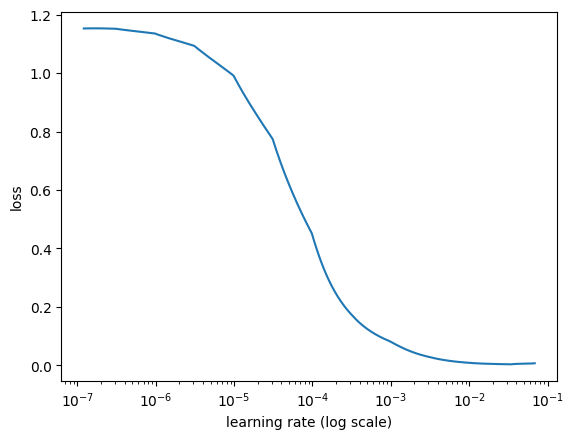

Strating transfer learning


begin training using triangular learning rate policy with max lr of 0.001...
Epoch 1/1024
62/62 [==============================] - 1s 7ms/step - loss: 0.1956 - mae: 0.3284 - val_loss: 0.0375 - val_mae: 0.1646
Epoch 2/1024
62/62 [==============================] - 0s 5ms/step - loss: 0.0228 - mae: 0.1250 - val_loss: 0.0084 - val_mae: 0.0797
Epoch 3/1024
62/62 [==============================] - 0s 5ms/step - loss: 0.0033 - mae: 0.0402 - val_loss: 3.5813e-04 - val_mae: 0.0106
Epoch 4/1024
62/62 [==============================] - 0s 6ms/step - loss: 3.1677e-04 - mae: 0.0092 - val_loss: 9.7329e-05 - val_mae: 0.0048
Epoch 5/1024
62/62 [==============================] - 0s 5ms/step - loss: 1.2459e-04 - mae: 0.0055 - val_loss: 9.1985e-05 - val_mae: 0.0047
Epoch 6/1024
62/62 [==============================] - 0s 5ms/step - loss: 9.7578e-05 - mae: 0.0048 - val_loss: 9.5396e-05 - val_mae: 0.0047
Epoch 7/1024
62/62 [==============================] - 0s 5ms/step - loss: 

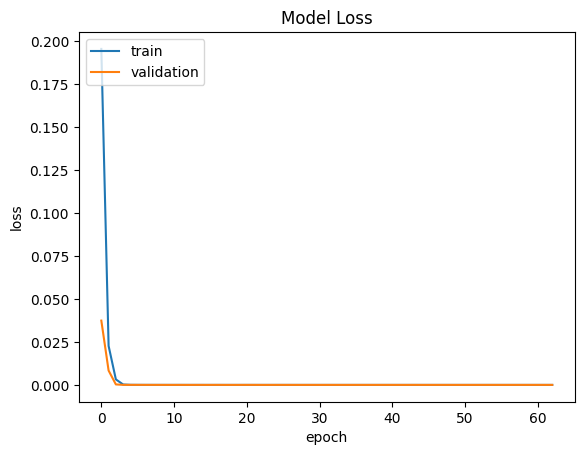

3/3 [==============================] - 0s 3ms/step
Generating Data For weber Backend
------------------------------------------
Executing CUT circuit ID: 4


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:40<00:00,  6.24it/s]


processing train: 7929 rows x 4 columns
['Target Value']
   Target Value
0      0.477539
1      0.522461
2     -1.000000
3     -1.000000
4     -1.000000
processing test: 71 rows x 4 columns
['Target Value']
     Target Value
261          -1.0
390          -1.0
475          -1.0
531          -1.0
532          -1.0
Loading baseline model for backend  weber
simulating training for different learning rates... this may take a few moments...
Epoch 1/16
61/61 [==============================] - 0s 5ms/step - loss: 1.8289 - mae: 1.1654
Epoch 2/16
61/61 [==============================] - 0s 5ms/step - loss: 1.8096 - mae: 1.1593
Epoch 3/16
61/61 [==============================] - 0s 5ms/step - loss: 1.7479 - mae: 1.1410
Epoch 4/16
61/61 [==============================] - 0s 5ms/step - loss: 1.6043 - mae: 1.0959
Epoch 5/16
61/61 [==============================] - 0s 5ms/step - loss: 1.2669 - mae: 0.9920
Epoch 6/16
61/61 [==============================] - 0s 5ms/step - loss: 0.8044 - mae: 0.8351
Ep

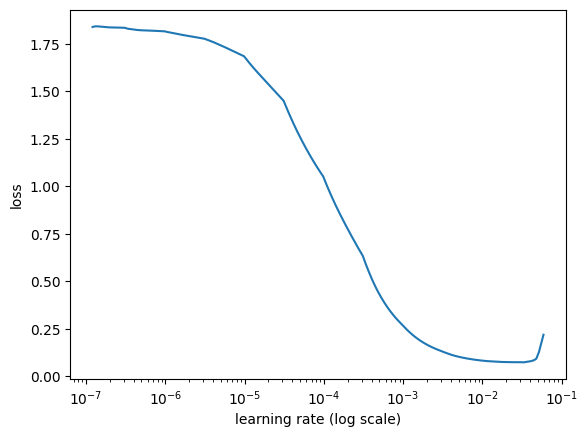

Strating transfer learning


begin training using triangular learning rate policy with max lr of 0.001...
Epoch 1/1024
62/62 [==============================] - 1s 7ms/step - loss: 0.4155 - mae: 0.4932 - val_loss: 0.0415 - val_mae: 0.1589
Epoch 2/1024
62/62 [==============================] - 0s 6ms/step - loss: 0.0759 - mae: 0.2170 - val_loss: 0.0231 - val_mae: 0.1168
Epoch 3/1024
62/62 [==============================] - 0s 6ms/step - loss: 0.0641 - mae: 0.1962 - val_loss: 0.0172 - val_mae: 0.0989
Epoch 4/1024
62/62 [==============================] - 0s 6ms/step - loss: 0.0592 - mae: 0.1865 - val_loss: 0.0139 - val_mae: 0.0864
Epoch 5/1024
62/62 [==============================] - 0s 6ms/step - loss: 0.0581 - mae: 0.1840 - val_loss: 0.0116 - val_mae: 0.0785
Epoch 6/1024
62/62 [==============================] - 0s 6ms/step - loss: 0.0537 - mae: 0.1766 - val_loss: 0.0106 - val_mae: 0.0816
Epoch 7/1024
62/62 [==============================] - 0s 6ms/step - loss: 0.0513 - mae: 0.1721 - val_l

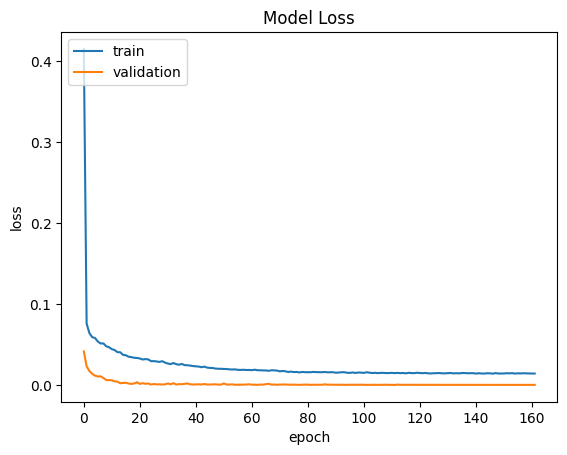

3/3 [==============================] - 0s 3ms/step
Current circuit:  phase
Generating Data For rainbow Backend
------------------------------------------
Executing CUT circuit ID: 3


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:51<00:00,  2.12it/s]

processing train: 7929 rows x 4 columns
['Target Value']
   Target Value
0      0.012695
1      0.052734
2      0.159180
3      0.010742
4      0.019531
processing test: 71 rows x 4 columns
['Target Value']
     Target Value
261      0.015625
390      0.670898
475      0.073242
531      0.032227
532      0.011719
Loading baseline model for backend  rainbow
simulating training for different learning rates... this may take a few moments...
Epoch 1/16


61/61 [==============================] - 0s 5ms/step - loss: 0.7594 - mae: 0.6505
Epoch 2/16
61/61 [==============================] - 0s 5ms/step - loss: 0.7393 - mae: 0.6414
Epoch 3/16
61/61 [==============================] - 0s 5ms/step - loss: 0.6888 - mae: 0.6172
Epoch 4/16
61/61 [==============================] - 0s 5ms/step - loss: 0.5728 - mae: 0.5654
Epoch 5/16
61/61 [==============================] - 0s 5ms/step - loss: 0.3695 - mae: 0.4745
Epoch 6/16
61/61 [==============================] - 0s 5ms/step - loss: 0.1922 - mae: 0.3611
Epoch 7/16
61/61 [==============================] - 0s 5ms/step - loss: 0.1494 - mae: 0.3173
Epoch 8/16
61/61 [==============================] - 0s 5ms/step - loss: 0.1418 - mae: 0.2930
Epoch 9/16
61/61 [==============================] - 0s 5ms/step - loss: 0.1395 - mae: 0.2789
Epoch 10/16
61/61 [==============================] - 0s 5ms/step - loss: 0.1398 - mae: 0.2806
Epoch 11/16
61/61 [==============================] - 0s 5ms/step - loss: 0.1392 

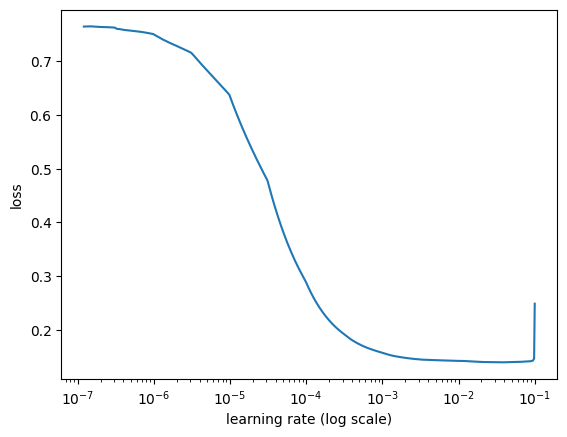

Strating transfer learning


begin training using triangular learning rate policy with max lr of 0.001...
Epoch 1/1024
62/62 [==============================] - 1s 7ms/step - loss: 0.2146 - mae: 0.3567 - val_loss: 0.1326 - val_mae: 0.3068
Epoch 2/1024
62/62 [==============================] - 0s 6ms/step - loss: 0.1398 - mae: 0.2850 - val_loss: 0.1226 - val_mae: 0.2784
Epoch 3/1024
62/62 [==============================] - 0s 6ms/step - loss: 0.1385 - mae: 0.2770 - val_loss: 0.1223 - val_mae: 0.2760
Epoch 4/1024
62/62 [==============================] - 0s 5ms/step - loss: 0.1383 - mae: 0.2756 - val_loss: 0.1227 - val_mae: 0.2748
Epoch 5/1024
62/62 [==============================] - 0s 5ms/step - loss: 0.1381 - mae: 0.2761 - val_loss: 0.1212 - val_mae: 0.2745
Epoch 6/1024
62/62 [==============================] - 0s 5ms/step - loss: 0.1382 - mae: 0.2760 - val_loss: 0.1225 - val_mae: 0.2752
Epoch 7/1024
62/62 [==============================] - 0s 6ms/step - loss: 0.1381 - mae: 0.2770 - val_l

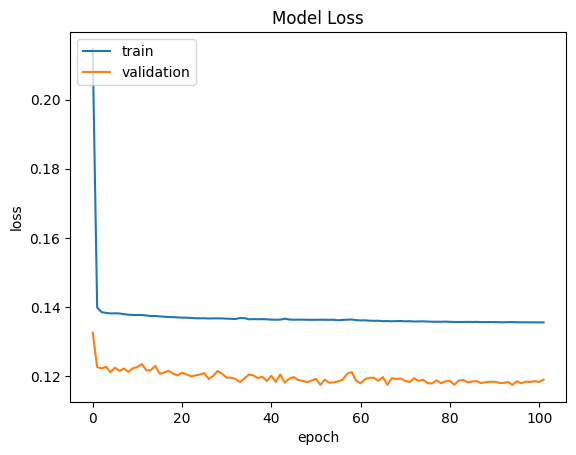

3/3 [==============================] - 0s 2ms/step
Generating Data For weber Backend
------------------------------------------
Executing CUT circuit ID: 3


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [08:24<00:00,  1.98it/s]

processing train: 7929 rows x 4 columns
['Target Value']
   Target Value
0      0.016602
1      0.050781
2      0.175781
3      0.012695
4      0.033203
processing test: 71 rows x 4 columns
['Target Value']
     Target Value
261      0.021484
390      0.676758
475      0.079102
531      0.037109
532      0.010742
Loading baseline model for backend  weber
simulating training for different learning rates... this may take a few moments...
Epoch 1/16


61/61 [==============================] - 0s 5ms/step - loss: 0.8069 - mae: 0.6864
Epoch 2/16
61/61 [==============================] - 0s 5ms/step - loss: 0.7992 - mae: 0.6815
Epoch 3/16
61/61 [==============================] - 0s 5ms/step - loss: 0.7662 - mae: 0.6643
Epoch 4/16
61/61 [==============================] - 0s 5ms/step - loss: 0.6865 - mae: 0.6211
Epoch 5/16
61/61 [==============================] - 0s 5ms/step - loss: 0.5232 - mae: 0.5226
Epoch 6/16
61/61 [==============================] - 0s 5ms/step - loss: 0.2962 - mae: 0.4118
Epoch 7/16
61/61 [==============================] - 0s 5ms/step - loss: 0.2079 - mae: 0.3506
Epoch 8/16
61/61 [==============================] - 0s 5ms/step - loss: 0.1986 - mae: 0.3351
Epoch 9/16
61/61 [==============================] - 0s 5ms/step - loss: 0.1876 - mae: 0.3121
Epoch 10/16
61/61 [==============================] - 0s 5ms/step - loss: 0.1877 - mae: 0.3127
Epoch 11/16
61/61 [==============================] - 0s 6ms/step - loss: 0.1903 

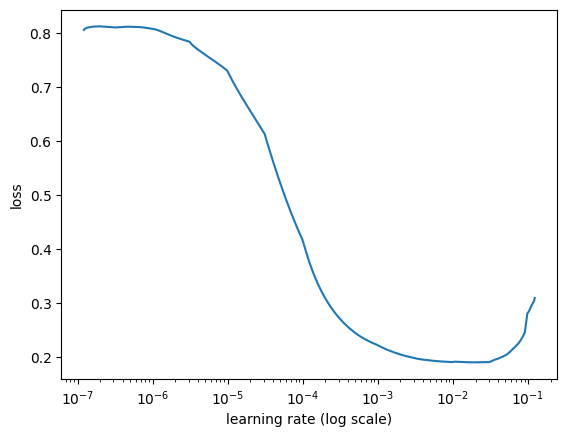

Strating transfer learning


begin training using triangular learning rate policy with max lr of 0.001...
Epoch 1/1024
62/62 [==============================] - 1s 8ms/step - loss: 0.2831 - mae: 0.3940 - val_loss: 0.1498 - val_mae: 0.2763
Epoch 2/1024
62/62 [==============================] - 0s 6ms/step - loss: 0.1900 - mae: 0.3170 - val_loss: 0.1414 - val_mae: 0.2449
Epoch 3/1024
62/62 [==============================] - 0s 6ms/step - loss: 0.1871 - mae: 0.3105 - val_loss: 0.1412 - val_mae: 0.2469
Epoch 4/1024
62/62 [==============================] - 0s 6ms/step - loss: 0.1860 - mae: 0.3093 - val_loss: 0.1392 - val_mae: 0.2440
Epoch 5/1024
62/62 [==============================] - 0s 6ms/step - loss: 0.1838 - mae: 0.3068 - val_loss: 0.1384 - val_mae: 0.2459
Epoch 6/1024
62/62 [==============================] - 0s 6ms/step - loss: 0.1837 - mae: 0.3089 - val_loss: 0.1401 - val_mae: 0.2453
Epoch 7/1024
62/62 [==============================] - 0s 6ms/step - loss: 0.1827 - mae: 0.3051 - val_l

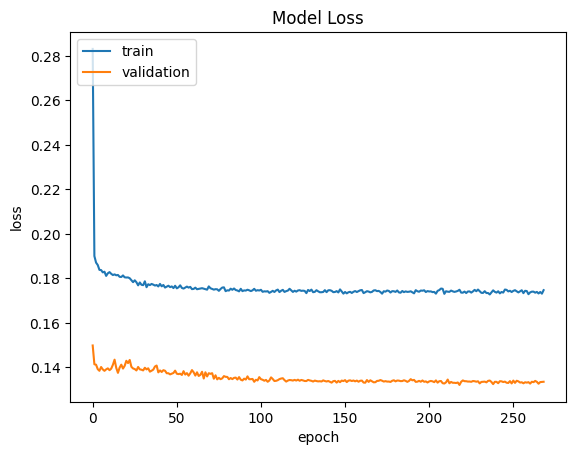

3/3 [==============================] - 0s 3ms/step
Current circuit:  addition
Generating Data For rainbow Backend
------------------------------------------
Executing CUT circuit ID: 1


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [52:00<00:00,  3.12s/it]

processing train: 7485 rows x 4 columns
['Target Value']
   Target Value
0           1.0
1          -1.0
2          -1.0
3          -1.0
4           1.0
processing test: 67 rows x 4 columns
['Target Value']
     Target Value
261          -1.0
390          -1.0
475          -1.0
531          -1.0
532          -1.0
Loading baseline model for backend  rainbow
simulating training for different learning rates... this may take a few moments...
Epoch 1/16


58/58 [==============================] - 0s 4ms/step - loss: 1.4216 - mae: 1.1340
Epoch 2/16
58/58 [==============================] - 0s 4ms/step - loss: 1.3982 - mae: 1.1249
Epoch 3/16
58/58 [==============================] - 0s 4ms/step - loss: 1.3385 - mae: 1.1014
Epoch 4/16
58/58 [==============================] - 0s 4ms/step - loss: 1.1974 - mae: 1.0424
Epoch 5/16
58/58 [==============================] - 0s 4ms/step - loss: 0.9205 - mae: 0.9049
Epoch 6/16
58/58 [==============================] - 0s 4ms/step - loss: 0.5701 - mae: 0.6747
Epoch 7/16
58/58 [==============================] - 0s 4ms/step - loss: 0.3405 - mae: 0.4793
Epoch 8/16
58/58 [==============================] - 0s 4ms/step - loss: 0.1382 - mae: 0.2100
Epoch 9/16
58/58 [==============================] - 0s 4ms/step - loss: 0.1178 - mae: 0.1451
Epoch 10/16
58/58 [==============================] - 0s 4ms/step - loss: 0.1185 - mae: 0.1385
Epoch 11/16
58/58 [==============================] - 0s 4ms/step - loss: 0.1283 

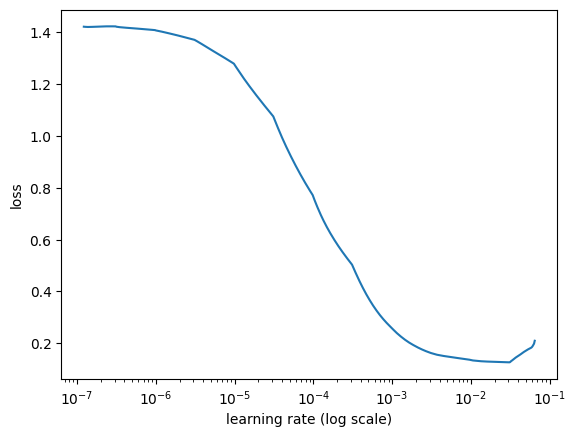

Strating transfer learning


begin training using triangular learning rate policy with max lr of 0.001...
Epoch 1/1024
59/59 [==============================] - 0s 6ms/step - loss: 0.4079 - mae: 0.4719 - val_loss: 0.1463 - val_mae: 0.1959
Epoch 2/1024
59/59 [==============================] - 0s 5ms/step - loss: 0.1253 - mae: 0.1637 - val_loss: 0.1360 - val_mae: 0.1481
Epoch 3/1024
59/59 [==============================] - 0s 5ms/step - loss: 0.1185 - mae: 0.1406 - val_loss: 0.1384 - val_mae: 0.1359
Epoch 4/1024
59/59 [==============================] - 0s 5ms/step - loss: 0.1162 - mae: 0.1325 - val_loss: 0.1435 - val_mae: 0.1347
Epoch 5/1024
59/59 [==============================] - 0s 5ms/step - loss: 0.1154 - mae: 0.1290 - val_loss: 0.1513 - val_mae: 0.1382
Epoch 6/1024
59/59 [==============================] - 0s 5ms/step - loss: 0.1155 - mae: 0.1284 - val_loss: 0.1590 - val_mae: 0.1510
Epoch 7/1024
59/59 [==============================] - 0s 5ms/step - loss: 0.1158 - mae: 0.1303 - val_l

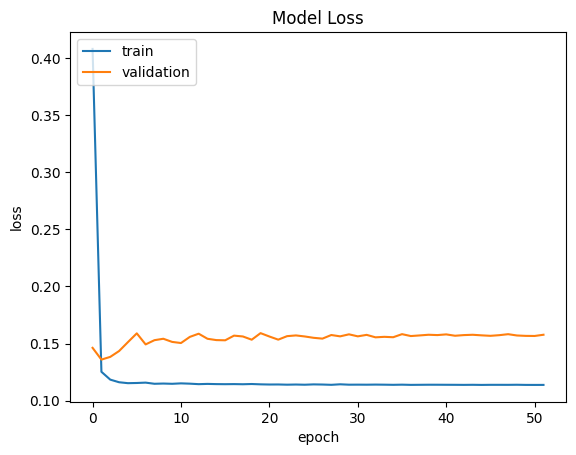

3/3 [==============================] - 0s 2ms/step
Generating Data For weber Backend
------------------------------------------
Executing CUT circuit ID: 1


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [46:22<00:00,  2.78s/it]

processing train: 7485 rows x 4 columns
['Target Value']
   Target Value
0           1.0
1          -1.0
2          -1.0
3          -1.0
4           1.0
processing test: 67 rows x 4 columns
['Target Value']
     Target Value
261          -1.0
390          -1.0
475          -1.0
531          -1.0
532          -1.0
Loading baseline model for backend  weber
simulating training for different learning rates... this may take a few moments...
Epoch 1/16


58/58 [==============================] - 0s 5ms/step - loss: 1.9148 - mae: 1.2889
Epoch 2/16
58/58 [==============================] - 0s 5ms/step - loss: 1.8832 - mae: 1.2801
Epoch 3/16
58/58 [==============================] - 0s 5ms/step - loss: 1.8275 - mae: 1.2643
Epoch 4/16
58/58 [==============================] - 0s 4ms/step - loss: 1.7147 - mae: 1.2288
Epoch 5/16
58/58 [==============================] - 0s 4ms/step - loss: 1.4198 - mae: 1.1374
Epoch 6/16
58/58 [==============================] - 0s 5ms/step - loss: 0.8891 - mae: 0.9047
Epoch 7/16
58/58 [==============================] - 0s 4ms/step - loss: 0.5722 - mae: 0.6251
Epoch 8/16
58/58 [==============================] - 0s 4ms/step - loss: 0.4314 - mae: 0.4666
Epoch 9/16
58/58 [==============================] - 0s 4ms/step - loss: 0.3880 - mae: 0.4240
Epoch 10/16
58/58 [==============================] - 0s 5ms/step - loss: 0.3866 - mae: 0.4307
Epoch 11/16
58/58 [==============================] - 0s 4ms/step - loss: 0.4175 

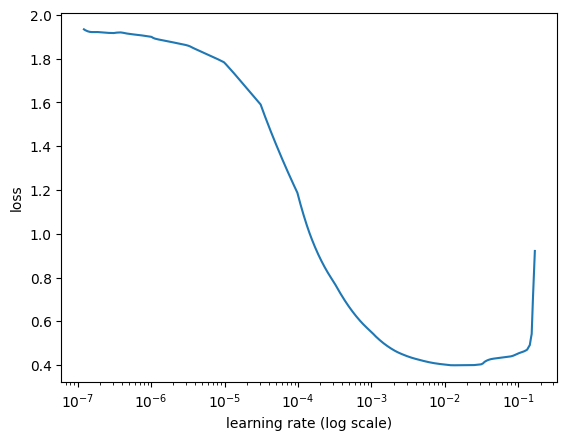

Strating transfer learning


begin training using triangular learning rate policy with max lr of 0.001...
Epoch 1/1024
59/59 [==============================] - 0s 6ms/step - loss: 0.6894 - mae: 0.6628 - val_loss: 0.2916 - val_mae: 0.3466
Epoch 2/1024
59/59 [==============================] - 0s 5ms/step - loss: 0.3860 - mae: 0.4206 - val_loss: 0.2904 - val_mae: 0.3518
Epoch 3/1024
59/59 [==============================] - 0s 5ms/step - loss: 0.3808 - mae: 0.4207 - val_loss: 0.2767 - val_mae: 0.3258
Epoch 4/1024
59/59 [==============================] - 0s 5ms/step - loss: 0.3777 - mae: 0.4189 - val_loss: 0.2710 - val_mae: 0.3063
Epoch 5/1024
59/59 [==============================] - 0s 5ms/step - loss: 0.3730 - mae: 0.4126 - val_loss: 0.2771 - val_mae: 0.3178
Epoch 6/1024
59/59 [==============================] - 0s 5ms/step - loss: 0.3721 - mae: 0.4112 - val_loss: 0.2766 - val_mae: 0.3083
Epoch 7/1024
59/59 [==============================] - 0s 5ms/step - loss: 0.3745 - mae: 0.4142 - val_l

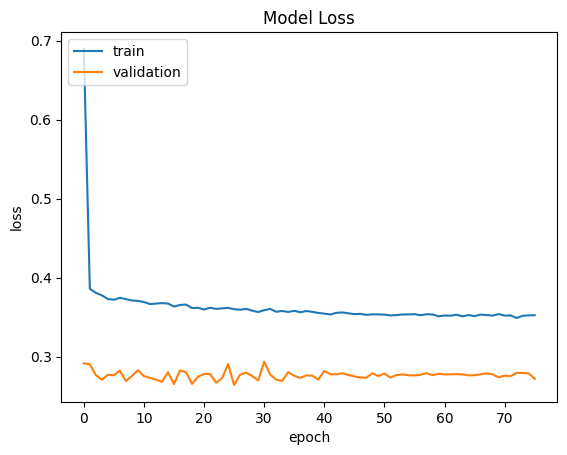

3/3 [==============================] - 0s 2ms/step
Current circuit:  simon
Generating Data For rainbow Backend
------------------------------------------
Executing CUT circuit ID: 5


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:42<00:00,  4.50it/s]

processing train: 7808 rows x 4 columns
['Target Value']
   Target Value
0      0.125977
1      0.133789
2      0.120117
3      0.127930
4      0.120117
processing test: 70 rows x 4 columns
['Target Value']
     Target Value
261      0.113281
390      0.256836
475      0.132812
531      0.273438
532      0.261719
Loading baseline model for backend  rainbow
simulating training for different learning rates... this may take a few moments...
Epoch 1/16


61/61 [==============================] - 0s 4ms/step - loss: 0.5706 - mae: 0.4497
Epoch 2/16
61/61 [==============================] - 0s 4ms/step - loss: 0.5528 - mae: 0.4444
Epoch 3/16
61/61 [==============================] - 0s 4ms/step - loss: 0.5095 - mae: 0.4311
Epoch 4/16
61/61 [==============================] - 0s 4ms/step - loss: 0.4107 - mae: 0.3979
Epoch 5/16
61/61 [==============================] - 0s 4ms/step - loss: 0.2466 - mae: 0.3243
Epoch 6/16
61/61 [==============================] - 0s 4ms/step - loss: 0.1313 - mae: 0.2298
Epoch 7/16
61/61 [==============================] - 0s 4ms/step - loss: 0.1151 - mae: 0.1990
Epoch 8/16
61/61 [==============================] - 0s 4ms/step - loss: 0.1126 - mae: 0.1814
Epoch 9/16
61/61 [==============================] - 0s 4ms/step - loss: 0.1096 - mae: 0.1788
Epoch 10/16
61/61 [==============================] - 0s 4ms/step - loss: 0.1012 - mae: 0.1783
Epoch 11/16
61/61 [==============================] - 0s 4ms/step - loss: 0.1060 

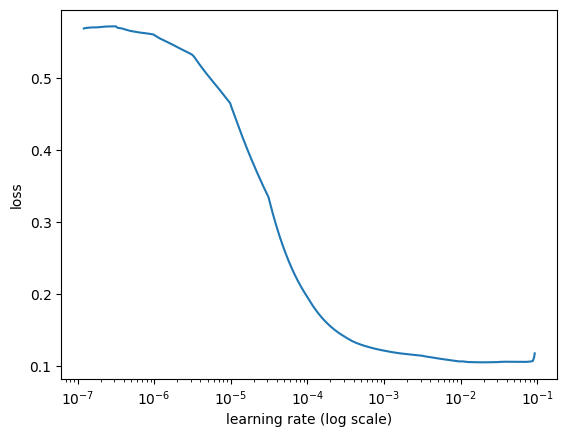

Strating transfer learning


begin training using triangular learning rate policy with max lr of 0.001...
Epoch 1/1024
61/61 [==============================] - 0s 5ms/step - loss: 0.1572 - mae: 0.2319 - val_loss: 0.1572 - val_mae: 0.2254
Epoch 2/1024
61/61 [==============================] - 0s 4ms/step - loss: 0.1121 - mae: 0.1840 - val_loss: 0.1466 - val_mae: 0.2268
Epoch 3/1024
61/61 [==============================] - 0s 4ms/step - loss: 0.1100 - mae: 0.1852 - val_loss: 0.1449 - val_mae: 0.2254
Epoch 4/1024
61/61 [==============================] - 0s 4ms/step - loss: 0.1079 - mae: 0.1850 - val_loss: 0.1424 - val_mae: 0.2274
Epoch 5/1024
61/61 [==============================] - 0s 4ms/step - loss: 0.1061 - mae: 0.1848 - val_loss: 0.1435 - val_mae: 0.2285
Epoch 6/1024
61/61 [==============================] - 0s 4ms/step - loss: 0.1043 - mae: 0.1834 - val_loss: 0.1424 - val_mae: 0.2220
Epoch 7/1024
61/61 [==============================] - 0s 5ms/step - loss: 0.1018 - mae: 0.1801 - val_l

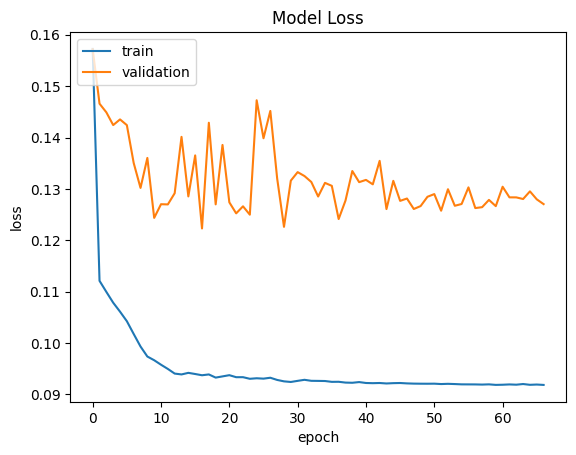

3/3 [==============================] - 0s 2ms/step
Generating Data For weber Backend
------------------------------------------
Executing CUT circuit ID: 5


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:47<00:00,  4.40it/s]

processing train: 7631 rows x 4 columns
['Target Value']
   Target Value
0      0.117188
1      0.139648
2      0.138672
3      0.111328
4      0.124023
processing test: 70 rows x 4 columns
['Target Value']
     Target Value
261      0.106445
390     -1.000000
475      0.107422
531      0.139648
532      0.125977
Loading baseline model for backend  weber
simulating training for different learning rates... this may take a few moments...
Epoch 1/16


59/59 [==============================] - 0s 5ms/step - loss: 0.5580 - mae: 0.4969
Epoch 2/16
59/59 [==============================] - 0s 4ms/step - loss: 0.5447 - mae: 0.4913
Epoch 3/16
59/59 [==============================] - 0s 4ms/step - loss: 0.5178 - mae: 0.4784
Epoch 4/16
59/59 [==============================] - 0s 4ms/step - loss: 0.4459 - mae: 0.4444
Epoch 5/16
59/59 [==============================] - 0s 4ms/step - loss: 0.3054 - mae: 0.3710
Epoch 6/16
59/59 [==============================] - 0s 4ms/step - loss: 0.1749 - mae: 0.2685
Epoch 7/16
59/59 [==============================] - 0s 4ms/step - loss: 0.1483 - mae: 0.2559
Epoch 8/16
59/59 [==============================] - 0s 4ms/step - loss: 0.1430 - mae: 0.2485
Epoch 9/16
59/59 [==============================] - 0s 4ms/step - loss: 0.1408 - mae: 0.2462
Epoch 10/16
59/59 [==============================] - 0s 4ms/step - loss: 0.1394 - mae: 0.2451
Epoch 11/16
59/59 [==============================] - 0s 4ms/step - loss: 0.1417 

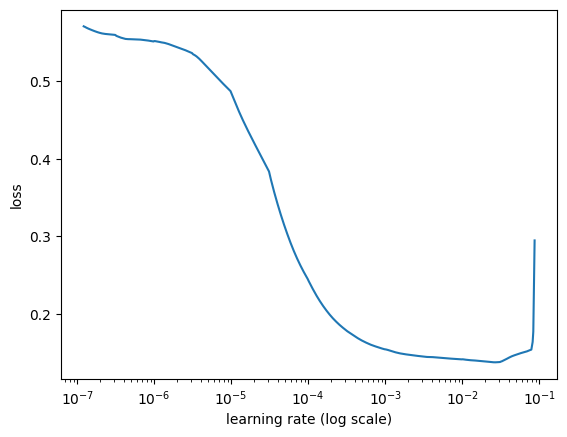

Strating transfer learning


begin training using triangular learning rate policy with max lr of 0.001...
Epoch 1/1024
60/60 [==============================] - 0s 6ms/step - loss: 0.1888 - mae: 0.2878 - val_loss: 0.1498 - val_mae: 0.2507
Epoch 2/1024
60/60 [==============================] - 0s 5ms/step - loss: 0.1428 - mae: 0.2445 - val_loss: 0.1517 - val_mae: 0.2445
Epoch 3/1024
60/60 [==============================] - 0s 5ms/step - loss: 0.1395 - mae: 0.2418 - val_loss: 0.1471 - val_mae: 0.2437
Epoch 4/1024
60/60 [==============================] - 0s 5ms/step - loss: 0.1379 - mae: 0.2398 - val_loss: 0.1467 - val_mae: 0.2400
Epoch 5/1024
60/60 [==============================] - 0s 5ms/step - loss: 0.1346 - mae: 0.2350 - val_loss: 0.1402 - val_mae: 0.2357
Epoch 6/1024
60/60 [==============================] - 0s 5ms/step - loss: 0.1308 - mae: 0.2312 - val_loss: 0.1363 - val_mae: 0.2285
Epoch 7/1024
60/60 [==============================] - 0s 5ms/step - loss: 0.1289 - mae: 0.2287 - val_l

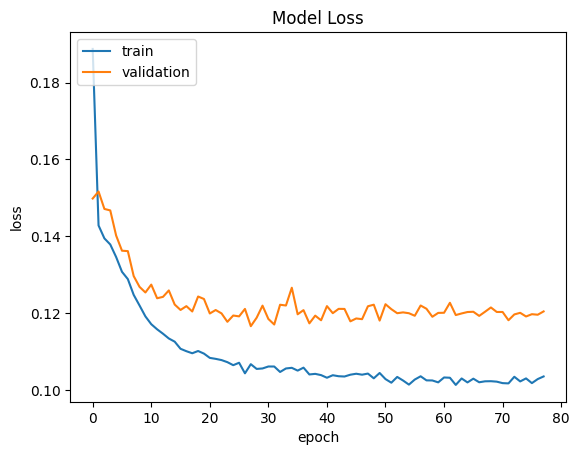

3/3 [==============================] - 0s 2ms/step
Current circuit:  qft
Generating Data For rainbow Backend
------------------------------------------
Executing CUT circuit ID: 6


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [18:34<00:00,  1.11s/it]

processing train: 29563 rows x 4 columns
['Target Value']
   Target Value
0           1.0
1          -1.0
2          -1.0
3          -1.0
4          -1.0
processing test: 300 rows x 4 columns
['Target Value']
     Target Value
261          -1.0
390          -1.0
475          -1.0
531          -1.0
532          -1.0
Loading baseline model for backend  rainbow
simulating training for different learning rates... this may take a few moments...
Epoch 1/16


230/230 [==============================] - 1s 4ms/step - loss: 1.9000 - mae: 1.2824
Epoch 2/16
230/230 [==============================] - 1s 4ms/step - loss: 1.8210 - mae: 1.2587
Epoch 3/16
230/230 [==============================] - 1s 4ms/step - loss: 1.6307 - mae: 1.1982
Epoch 4/16
230/230 [==============================] - 1s 4ms/step - loss: 1.2226 - mae: 1.0456
Epoch 5/16
230/230 [==============================] - 1s 4ms/step - loss: 0.5941 - mae: 0.6951
Epoch 6/16
230/230 [==============================] - 1s 4ms/step - loss: 0.2311 - mae: 0.3382
Epoch 7/16
230/230 [==============================] - 1s 4ms/step - loss: 0.0652 - mae: 0.1011
Epoch 8/16
230/230 [==============================] - 1s 4ms/step - loss: 0.0615 - mae: 0.0725
Epoch 9/16
230/230 [==============================] - 1s 4ms/step - loss: 0.0628 - mae: 0.0753
Epoch 10/16
230/230 [==============================] - 1s 4ms/step - loss: 0.0645 - mae: 0.0886
Epoch 11/16
230/230 [==============================] - 1s 4m

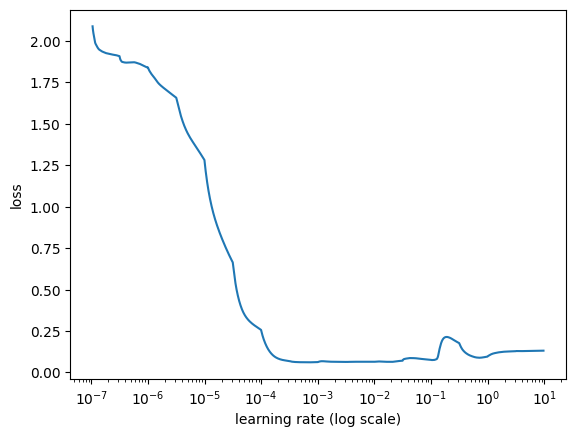

Strating transfer learning


begin training using triangular learning rate policy with max lr of 0.001...
Epoch 1/1024
231/231 [==============================] - 1s 5ms/step - loss: 0.1913 - mae: 0.2158 - val_loss: 0.0365 - val_mae: 0.0454
Epoch 2/1024
231/231 [==============================] - 1s 4ms/step - loss: 0.0599 - mae: 0.0685 - val_loss: 0.0362 - val_mae: 0.0503
Epoch 3/1024
231/231 [==============================] - 1s 4ms/step - loss: 0.0588 - mae: 0.0670 - val_loss: 0.0373 - val_mae: 0.0562
Epoch 4/1024
231/231 [==============================] - 1s 4ms/step - loss: 0.0589 - mae: 0.0653 - val_loss: 0.0358 - val_mae: 0.0450
Epoch 5/1024
231/231 [==============================] - 1s 4ms/step - loss: 0.0588 - mae: 0.0677 - val_loss: 0.0359 - val_mae: 0.0468
Epoch 6/1024
231/231 [==============================] - 1s 4ms/step - loss: 0.0591 - mae: 0.0677 - val_loss: 0.0367 - val_mae: 0.0424
Epoch 7/1024
231/231 [==============================] - 1s 4ms/step - loss: 0.0590 - mae: 

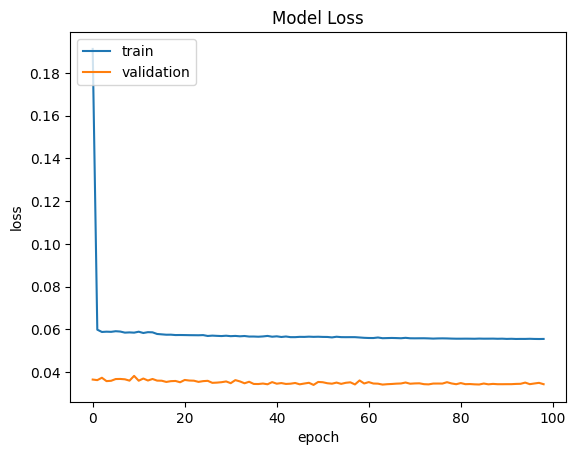

10/10 [==============================] - 0s 2ms/step
Generating Data For weber Backend
------------------------------------------
Executing CUT circuit ID: 6


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [19:36<00:00,  1.18s/it]


processing train: 31542 rows x 4 columns
['Target Value']
   Target Value
0           1.0
1          -1.0
2          -1.0
3          -1.0
4          -1.0
processing test: 320 rows x 4 columns
['Target Value']
     Target Value
261          -1.0
390          -1.0
475          -1.0
531          -1.0
532          -1.0
Loading baseline model for backend  weber
simulating training for different learning rates... this may take a few moments...
Epoch 1/16
246/246 [==============================] - 1s 4ms/step - loss: 2.0000 - mae: 1.3238
Epoch 2/16
246/246 [==============================] - 1s 4ms/step - loss: 1.9450 - mae: 1.3086
Epoch 3/16
246/246 [==============================] - 1s 4ms/step - loss: 1.7969 - mae: 1.2673
Epoch 4/16
246/246 [==============================] - 1s 4ms/step - loss: 1.4310 - mae: 1.1478
Epoch 5/16
246/246 [==============================] - 1s 4ms/step - loss: 0.7564 - mae: 0.8268
Epoch 6/16
246/246 [==============================] - 1s 4ms/step - loss: 0.2918 - 

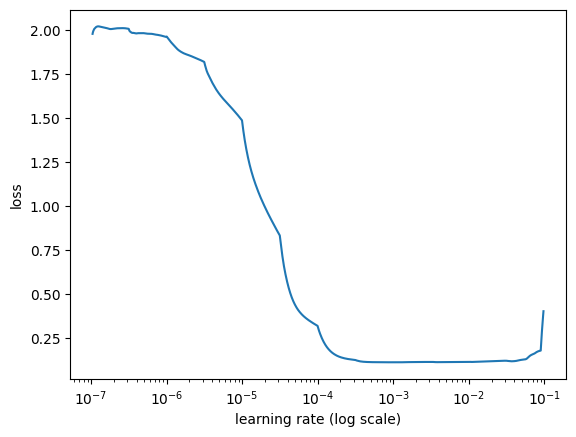

Strating transfer learning


begin training using triangular learning rate policy with max lr of 0.001...
Epoch 1/1024
247/247 [==============================] - 1s 5ms/step - loss: 0.2619 - mae: 0.3094 - val_loss: 0.1324 - val_mae: 0.1191
Epoch 2/1024
247/247 [==============================] - 1s 5ms/step - loss: 0.1080 - mae: 0.1649 - val_loss: 0.1298 - val_mae: 0.1336
Epoch 3/1024
247/247 [==============================] - 1s 5ms/step - loss: 0.1058 - mae: 0.1616 - val_loss: 0.1299 - val_mae: 0.1253
Epoch 4/1024
247/247 [==============================] - 1s 4ms/step - loss: 0.1062 - mae: 0.1606 - val_loss: 0.1325 - val_mae: 0.1251
Epoch 5/1024
247/247 [==============================] - 1s 4ms/step - loss: 0.1052 - mae: 0.1588 - val_loss: 0.1300 - val_mae: 0.1189
Epoch 6/1024
247/247 [==============================] - 1s 4ms/step - loss: 0.1047 - mae: 0.1575 - val_loss: 0.1299 - val_mae: 0.1200
Epoch 7/1024
247/247 [==============================] - 1s 4ms/step - loss: 0.1037 - mae: 

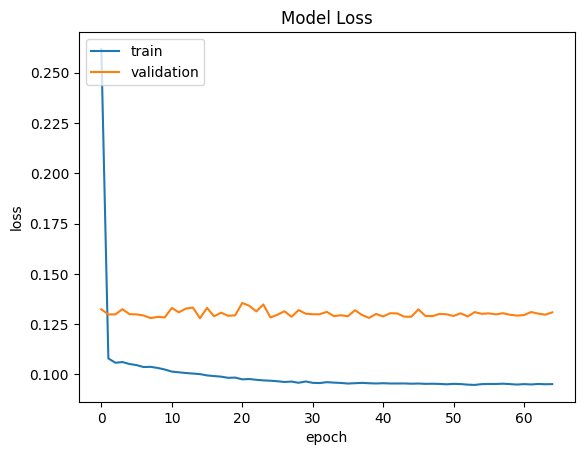

10/10 [==============================] - 0s 2ms/step
Current circuit:  similarity
Generating Data For rainbow Backend
------------------------------------------
Executing CUT circuit ID: 7


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [41:03<00:00,  2.46s/it]

processing train: 15855 rows x 4 columns
['Target Value']
   Target Value
0      0.258789
1      0.741211
2      0.000000
3     -1.000000
4     -1.000000
processing test: 145 rows x 4 columns
['Target Value']
     Target Value
261          -1.0
390          -1.0
475          -1.0
531          -1.0
532          -1.0
Loading baseline model for backend  rainbow
simulating training for different learning rates... this may take a few moments...
Epoch 1/16


123/123 [==============================] - 1s 4ms/step - loss: 1.6913 - mae: 1.1917
Epoch 2/16
123/123 [==============================] - 0s 4ms/step - loss: 1.6397 - mae: 1.1746
Epoch 3/16
123/123 [==============================] - 0s 4ms/step - loss: 1.5189 - mae: 1.1332
Epoch 4/16
123/123 [==============================] - 0s 4ms/step - loss: 1.2498 - mae: 1.0307
Epoch 5/16
123/123 [==============================] - 0s 4ms/step - loss: 0.7844 - mae: 0.8092
Epoch 6/16
123/123 [==============================] - 0s 4ms/step - loss: 0.4045 - mae: 0.5271
Epoch 7/16
123/123 [==============================] - 0s 4ms/step - loss: 0.2446 - mae: 0.3552
Epoch 8/16
123/123 [==============================] - 0s 4ms/step - loss: 0.1938 - mae: 0.2562
Epoch 9/16
123/123 [==============================] - 0s 4ms/step - loss: 0.1988 - mae: 0.2599
Epoch 10/16
123/123 [==============================] - 0s 4ms/step - loss: 0.2012 - mae: 0.2737
Epoch 11/16
123/123 [==============================] - 0s 4m

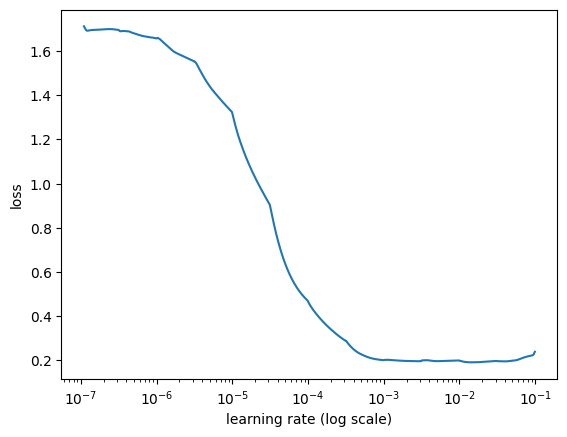

Strating transfer learning


begin training using triangular learning rate policy with max lr of 0.001...
Epoch 1/1024
124/124 [==============================] - 1s 5ms/step - loss: 0.3487 - mae: 0.4063 - val_loss: 0.2527 - val_mae: 0.2884
Epoch 2/1024
124/124 [==============================] - 1s 4ms/step - loss: 0.1921 - mae: 0.2565 - val_loss: 0.2440 - val_mae: 0.2782
Epoch 3/1024
124/124 [==============================] - 1s 4ms/step - loss: 0.1911 - mae: 0.2571 - val_loss: 0.2504 - val_mae: 0.2850
Epoch 4/1024
124/124 [==============================] - 1s 4ms/step - loss: 0.1887 - mae: 0.2517 - val_loss: 0.2488 - val_mae: 0.2693
Epoch 5/1024
124/124 [==============================] - 1s 4ms/step - loss: 0.1889 - mae: 0.2519 - val_loss: 0.2454 - val_mae: 0.2871
Epoch 6/1024
124/124 [==============================] - 1s 4ms/step - loss: 0.1882 - mae: 0.2505 - val_loss: 0.2551 - val_mae: 0.2885
Epoch 7/1024
124/124 [==============================] - 1s 4ms/step - loss: 0.1886 - mae: 

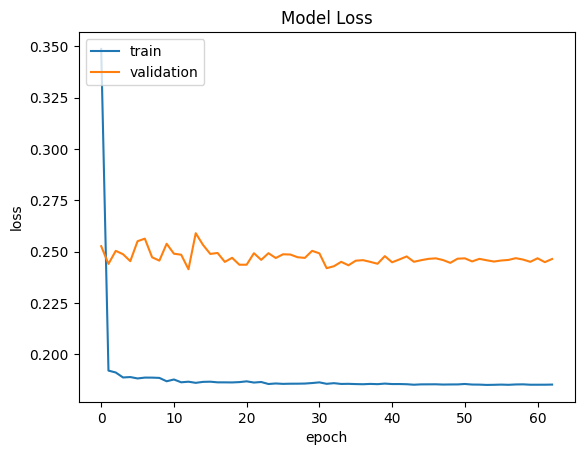

5/5 [==============================] - 0s 2ms/step
Generating Data For weber Backend
------------------------------------------
Executing CUT circuit ID: 7


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [47:22<00:00,  2.84s/it]

processing train: 15855 rows x 4 columns
['Target Value']
   Target Value
0      0.228516
1      0.771484
2      0.000000
3     -1.000000
4     -1.000000
processing test: 145 rows x 4 columns
['Target Value']
     Target Value
261          -1.0
390          -1.0
475          -1.0
531          -1.0
532          -1.0
Loading baseline model for backend  weber
simulating training for different learning rates... this may take a few moments...
Epoch 1/16


123/123 [==============================] - 1s 5ms/step - loss: 1.7996 - mae: 1.2459
Epoch 2/16
123/123 [==============================] - 1s 5ms/step - loss: 1.7675 - mae: 1.2356
Epoch 3/16
123/123 [==============================] - 1s 5ms/step - loss: 1.6873 - mae: 1.2099
Epoch 4/16
123/123 [==============================] - 1s 5ms/step - loss: 1.4818 - mae: 1.1383
Epoch 5/16
123/123 [==============================] - 1s 5ms/step - loss: 1.0263 - mae: 0.9551
Epoch 6/16
123/123 [==============================] - 1s 5ms/step - loss: 0.5032 - mae: 0.6191
Epoch 7/16
123/123 [==============================] - 1s 5ms/step - loss: 0.2983 - mae: 0.4119
Epoch 8/16
123/123 [==============================] - 1s 5ms/step - loss: 0.2449 - mae: 0.3248
Epoch 9/16
123/123 [==============================] - 1s 5ms/step - loss: 0.2455 - mae: 0.3282
Epoch 10/16
123/123 [==============================] - 1s 5ms/step - loss: 0.2548 - mae: 0.3392
Epoch 11/16
123/123 [==============================] - 1s 5m

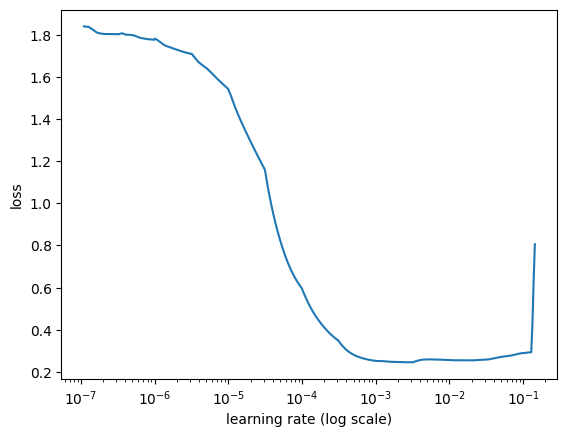

Strating transfer learning


begin training using triangular learning rate policy with max lr of 0.001...
Epoch 1/1024
124/124 [==============================] - 1s 6ms/step - loss: 0.4304 - mae: 0.4799 - val_loss: 0.2902 - val_mae: 0.3302
Epoch 2/1024
124/124 [==============================] - 1s 5ms/step - loss: 0.2404 - mae: 0.3209 - val_loss: 0.2878 - val_mae: 0.3255
Epoch 3/1024
124/124 [==============================] - 1s 5ms/step - loss: 0.2402 - mae: 0.3194 - val_loss: 0.2871 - val_mae: 0.3286
Epoch 4/1024
124/124 [==============================] - 1s 5ms/step - loss: 0.2415 - mae: 0.3206 - val_loss: 0.2872 - val_mae: 0.3352
Epoch 5/1024
124/124 [==============================] - 1s 5ms/step - loss: 0.2395 - mae: 0.3179 - val_loss: 0.2837 - val_mae: 0.3458
Epoch 6/1024
124/124 [==============================] - 1s 5ms/step - loss: 0.2403 - mae: 0.3191 - val_loss: 0.2864 - val_mae: 0.3373
Epoch 7/1024
124/124 [==============================] - 1s 5ms/step - loss: 0.2388 - mae: 

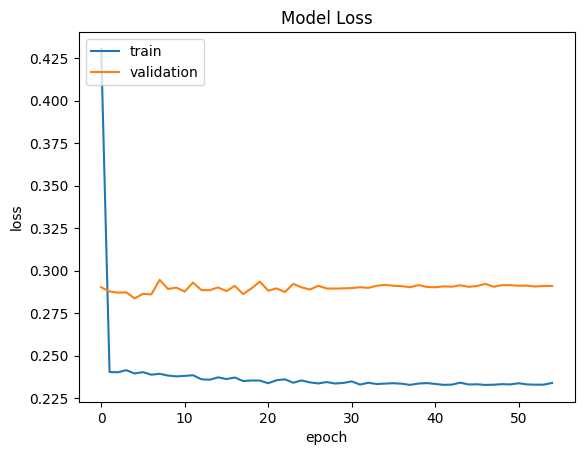

5/5 [==============================] - 0s 2ms/step


In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0"; 

import urllib.request
import pandas as pd
import numpy as np
import time
import ktrain
from ktrain import tabular
from sklearn.model_selection import train_test_split
from tqdm import *
pd.set_option('display.max_columns', None)


# In[2]:


from benchmark_circuits import *
import random
import pandas as pd
from tqdm import *
import pkgutil
import warnings
import exrex
import math
import time
warnings.filterwarnings('ignore')


# # Select CUTs

# In[3]:


backends = [('rainbow', 23), ('weber', 53)]
BaselineCircuits,CUTs = train_test_split(get_all_circuits(),train_size=0.4,random_state=13)


# # Start Transfer learning

# In[5]:


backend_factory = BackendFactory()
backend_executors = {}
backend = backend_factory.initialize_backend()
for bk, qubit_size in backends:
    backend_executors[bk] = backend_factory.initialize_backend(bk)

for cut in CUTs:
    # if cut!="simon":
    #    continue
    print("Current circuit: ",cut)
    circuit = get_circuit_class_object(cut)
    test_inputs = circuit.get_full_inputs()

    for bk, qubit_size in backends:
        data_rows = []
        single_row = []
        
        backend_noise = backend_executors[bk]

        print("Generating Data For {} Backend".format(bk))
        print("------------------------------------------")

        print("Executing CUT circuit ID: {}".format(circuit.key_aurguments["ID"]))
        start_time = time.time()

        for iteration in tqdm(range(1000)):
            inp = test_inputs[iteration%len(test_inputs)]
            ideal = circuit.get_result(backend,inp)
            Noise = circuit.get_result(backend_noise,inp)

            for outputs in ideal["probability"]:
                target_variable_prob = None
                target_variable_odds = None
                actual_target_prob = outputs["prob"]
                all_other_probs = 0
                for noise_outputs in Noise["probability"]:
                    if outputs["bin"] == noise_outputs["bin"]:
                        target_variable_prob = noise_outputs["prob"]
                        target_variable_odds = noise_outputs["odds"]
                    else:
                        all_other_probs += noise_outputs["prob"]
                temp_row = [x for x in single_row]
                temp_row.extend([all_other_probs,target_variable_odds,target_variable_prob,actual_target_prob])
                data_rows.append(temp_row)
                
            #0----0-0-----------0-0-00000000000000-0-0-00000000000000000--0-0----------------
            for outputs in Noise["probability"]:
                if outputs["bin"] not in [x["bin"] for x in ideal["probability"]]:
                    target_variable_prob = None
                    target_variable_odds = None
                    actual_target_prob = -1
                    all_other_probs = 0
                    for noise_outputs in Noise["probability"]:
                        if outputs["bin"] == noise_outputs["bin"]:
                            target_variable_prob = noise_outputs["prob"]
                            target_variable_odds = noise_outputs["odds"]
                        else:
                            all_other_probs += noise_outputs["prob"]
                    temp_row = [x for x in single_row]
                    temp_row.extend([all_other_probs,target_variable_odds,target_variable_prob,actual_target_prob])
                    data_rows.append(temp_row)


        # #-=-=-=-=-=-=-==-=-=-=-=-=-=-==-Appending to CSV-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

        columns = []
        columns.extend(["POF","ODR","POS","Target Value"])
        data_frame = pd.DataFrame(data_rows,columns=columns)
        data_frame.to_csv("baseline_tunning_data/{}_{}.csv".format(bk,cut),index=False)
        
            
        # Transfer learning
        bkfile = "baseline_tunning_data/{}_{}.csv".format(bk,cut)
        train_df = pd.read_csv(bkfile)
        train_df = train_df.dropna()
        trn, val, preproc = tabular.tabular_from_df(train_df, is_regression=True, 
                                                     label_columns='Target Value', random_state=42,val_pct=0.01)
        
        print("Loading baseline model for backend ",bk)
        predictor = ktrain.load_predictor('baseline_models/{}_baseline'.format(bk))
        
        model = predictor.model
        
        learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=128)

        learner.lr_find(show_plot=True, max_epochs=16)
        
        print("Strating transfer learning")

        learner.autofit(1e-3,early_stopping=50,reduce_on_plateau=10)

        epochs = len(learner.history.history["loss"])

        fig = learner.plot(return_fig=True)
        fig.savefig("figures/loss_{}_{}.png".format(bk,cut),dpi=400)

        trainingloss = learner.evaluate(test_data=trn)[0][-1]

        validationloss = learner.evaluate()[0][-1]


        ktrain.get_predictor(learner.model, preproc).save('tunning_models/{}_{}'.format(bk,cut))

        file = open("baseline_tunning_data/{}_{}_ToT.csv".format(bk,cut),"w")
        file.write(",".join([str(trainingloss),str(validationloss),str(time.time()-start_time),str(epochs)]))
        file.close()
        #break

  0%|                                                                                            | 0/12 [00:00<?, ?it/s]

rainbow_simon.json
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
[[0.125     ]
 [0.11132812]
 [0.12890625]
 [0.13671875]
 [0.13085938]
 [0.12109375]
 [0.10742188]
 [0.13867188]] [[0.1365057 ]
 [0.05327116]
 [0.14222755]
 [0.08641254]
 [0.1407107 ]
 [0.05680528]
 [0.07566776]
 [0.10947929]] [0.125, 0.111328125, 0.12890625, 0.13671875, 0.130859375, 0.12109375, 0.107421875, 0.138671875]
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Ta

  8%|███████                                                                             | 1/12 [00:02<00:23,  2.12s/it]

['Target Value']
   Target Value
0           0.0
[[0.21972656]
 [0.26074219]
 [0.27050781]
 [0.24902344]] [[0.11827751]
 [0.        ]
 [0.        ]
 [0.13941568]] [0.2197265625, 0.2607421875, 0.2705078125, 0.2490234375]
weber_qft.json
['Target Value']
   Target Value
0           0.0
[[1.]
 [0.]] [[0]
 [0]] [1.0, 0]
['Target Value']
   Target Value
0           0.0
[[1.]
 [0.]] [[0]
 [0]] [1.0, 0]
['Target Value']
   Target Value
0           0.0
[[1.]
 [0.]] [[0]
 [0]] [1.0, 0]
['Target Value']
   Target Value
0           0.0
[[1.]
 [0.]] [[0]
 [0]] [1.0, 0]
['Target Value']
   Target Value
0           0.0
[[1.]
 [0.]] [[0]
 [0]] [1.0, 0]
['Target Value']
   Target Value
0           0.0
[[1.]
 [0.]] [[0]
 [0]] [1.0, 0]
['Target Value']
   Target Value
0           0.0
[[1.]
 [0.]] [[0]
 [0]] [1.0, 0]
['Target Value']
   Target Value
0           0.0
[[1.]
 [0.]] [[0.23755041]
 [0.        ]] [1.0, 0]
['Target Value']
   Target Value
0           0.0
[[1.]
 [0.]] [[0]
 [0]] [1.0, 0]
['Target 

 17%|██████████████                                                                      | 2/12 [00:03<00:17,  1.72s/it]

[[1.]
 [0.]] [[0]
 [0]] [1.0, 0]
['Target Value']
   Target Value
0           0.0
[[1.]
 [0.]] [[0]
 [0]] [1.0, 0]
['Target Value']
   Target Value
0           0.0
[[1.]
 [0.]] [[0]
 [0]] [1.0, 0]
['Target Value']
   Target Value
0           0.0
[[1.]
 [0.]] [[0]
 [0]] [1.0, 0]
weber_simon.json
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
[[0.14355469]
 [0.13769531]
 [0.12011719]
 [0.10449219]
 [0.10839844]
 [0.12207031]
 [0.13867188]
 [0.125     ]] [[0.04844075]
 [0.11671603]
 [0.        ]
 [0.1133611 ]
 [0.06461433]
 [0.07658654]
 [0.06461433]
 [0.        ]] [0.1435546875, 0.1376953125, 0.1201171875, 0.1044921875, 0.1083984375, 0.1220703125, 0

 25%|█████████████████████                                                               | 3/12 [00:05<00:16,  1.85s/it]

['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
[[0.2578125 ]
 [0.23828125]
 [0.25976562]
 [0.24414062]] [[0.18065089]
 [0.07143069]
 [0.04844075]
 [0.08909685]] [0.2578125, 0.23828125, 0.259765625, 0.244140625]
rainbow_ghz.json
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
[[0.49902344]
 [0.50097656]] [[0.49922982]
 [0.49418673]] [0.4990234375, 0.5009765625]
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
[[0.49804688]
 [0.50195312]] [[0.50261146]
 [0.501879  ]] [0.498046875, 0.501953125]
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0


 33%|████████████████████████████                                                        | 4/12 [00:05<00:10,  1.29s/it]

[[0.48339844]
 [0.51660156]] [[0.5024351 ]
 [0.50182647]] [0.4833984375, 0.5166015625]
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
[[0.52539062]
 [0.47460938]] [[0.50261146]
 [0.5016301 ]] [0.525390625, 0.474609375]
weber_phase.json
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
[[0.01269531]
 [0.04199219]
 [0.17382812]
 [0.01171875]
 [0.03808594]
 [0.01855469]
 [0.68847656]
 [0.01464844]] [[0.04700555]
 [0.        ]
 [0.02718729]
 [0.        ]
 [0.04892327]
 [0.        ]
 [1.        ]
 [0.        ]] [0.0126953125, 0.0419921875, 0.173828125, 0.01171875, 0.0380859375, 0.0185546875, 0.6884765625,

 42%|███████████████████████████████████                                                 | 5/12 [00:09<00:14,  2.08s/it]

['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
[[0.41308594]
 [0.15625   ]
 [0.01464844]
 [0.18066406]
 [0.09179688]
 [0.12597656]
 [0.01757812]] [[0.62073767]
 [0.        ]
 [0.03981291]
 [0.        ]
 [0.19991782]
 [0.        ]
 [0.        ]] [0.4130859375, 0.15625, 0.0146484375, 0.1806640625, 0.091796875, 0.1259765625, 0.017578125]
weber_ghz.json
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
[[0.50292969]
 [0.49707031]] [[0.44245797]
 [0.4940886 ]] [0.5029296875, 0.4970703125]
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
[[0.52246094]
 [0.47753906]] [[0.50061697]
 [0.4895721 ]] [0.5224609375, 0.4775390625]
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0


 50%|██████████████████████████████████████████                                          | 6/12 [00:09<00:09,  1.53s/it]

[[0.51953125]
 [0.48046875]] [[0.49297887]
 [0.4940886 ]] [0.51953125, 0.48046875]
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
[[0.52539062]
 [0.47460938]] [[0.4987759]
 [0.4895721]] [0.525390625, 0.474609375]
rainbow_addition.json
['Target Value']
   Target Value
0           0.0
[[1.]
 [0.]] [[0.93366832]
 [0.        ]] [1.0, 0]
['Target Value']
   Target Value
0           0.0
[[1.]
 [0.]] [[0]
 [0]] [1.0, 0]
['Target Value']
   Target Value
0           0.0
[[1.]
 [0.]] [[1]
 [0]] [1.0, 0]
['Target Value']
   Target Value
0           0.0
[[1.]
 [0.]] [[0]
 [0]] [1.0, 0]
['Target Value']
   Target Value
0           0.0
[[1.]
 [0.]] [[0.88704008]
 [0.        ]] [1.0, 0]
['Target Value']
   Target Value
0           0.0


 58%|█████████████████████████████████████████████████                                   | 7/12 [00:10<00:06,  1.20s/it]

[[1.]
 [0.]] [[0]
 [0]] [1.0, 0]
['Target Value']
   Target Value
0           0.0
[[1.]
 [0.]] [[1]
 [0]] [1.0, 0]
['Target Value']
   Target Value
0           0.0
[[1.]
 [0.]] [[0]
 [0]] [1.0, 0]
['Target Value']
   Target Value
0           0.0
[[1.]
 [0.]] [[0.95036179]
 [0.        ]] [1.0, 0]
weber_similarity.json
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
[[0.25195312]
 [0.74804688]
 [0.        ]] [[0]
 [0]
 [0]] [0.251953125, 0.748046875, 0.0]
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
[[0.25390625]
 [0.74609375]
 [0.        ]] [[0]
 [0]
 [0]] [0.25390625, 0.74609375, 0.0]
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
[[1.]
 [0.]] [[0]
 [0]] [1.0, 0.0]
['Target Value']
   Target Value
0           0.0
['Target Value']
   Targe

 67%|████████████████████████████████████████████████████████                            | 8/12 [00:16<00:10,  2.61s/it]

['Target Value']
   Target Value
0           0.0
[[1.]
 [0.]] [[0]
 [0]] [1.0, 0.0]
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
[[0.25390625]
 [0.74609375]] [[0]
 [0]] [0.25390625, 0.74609375]
rainbow_similarity.json
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
[[0.24902344]
 [0.75097656]
 [0.        ]] [[0]
 [0]
 [0]] [0.2490234375, 0.7509765625, 0.0]
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
[[0.24511719]
 [0.75488281]
 [0.        ]] [[0]
 [0]
 [0]] [0.2451171875, 0.7548828125, 0.0]
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
[[1.]
 [0.]] [[0.73413914]
 [0.        ]] [1.0, 0.0]
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0


 75%|███████████████████████████████████████████████████████████████                     | 9/12 [00:21<00:10,  3.45s/it]

[[1.]
 [0.]] [[0]
 [0]] [1.0, 0.0]
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
[[1.]
 [0.]] [[0]
 [0]] [1.0, 0.0]
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
[[0.26464844]
 [0.73535156]] [[0]
 [0]] [0.2646484375, 0.7353515625]
rainbow_phase.json
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
[[0.0078125 ]
 [0.04589844]
 [0.16601562]
 [0.01367188]
 [0.03027344]
 [0.01660156]
 [0.70996094]
 [0.00976562]] [[0.        ]
 [0.        ]
 [0.1349549 ]
 [0.        ]
 [0.00686042]
 [0.        ]
 [0.53310066]
 [0.        ]] [0.0078125, 0.0458984375, 0.

 83%|█████████████████████████████████████████████████████████████████████▏             | 10/12 [00:25<00:07,  3.53s/it]

['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
[[0.44335938]
 [0.14648438]
 [0.00683594]
 [0.17578125]
 [0.08496094]
 [0.125     ]
 [0.01757812]] [[0.47168609]
 [0.        ]
 [0.        ]
 [0.11956103]
 [0.1036008 ]
 [0.        ]
 [0.        ]] [0.443359375, 0.146484375, 0.0068359375, 0.17578125, 0.0849609375, 0.125, 0.017578125]
rainbow_qft.json
['Target Value']
   Target Value
0           0.0
[[1.]
 [0.]] [[0]
 [0]] [1.0, 0]
['Target Value']
   Target Value
0           0.0
[[1.]
 [0.]] [[0.89032149]
 [0.        ]] [1.0, 0]
['Target Value']
   Target Value
0           0.0
[[1.]
 [0.]] [[0]
 [0]] [1.0, 0]
['Target Value']
   Target Value
0           0.0
[[1.]
 [0.]] [[0.83472055]
 [0.        ]] [1.0, 0]
['Target Value']
   Target Value
0           0.0
[[1.]
 [0.]] [[0.62496048]
 [0.        ]] [1.0, 0]
['Target Value']
   Target Value
0           0.0
[[1.]
 [0.]] [[0.96350425]
 [0.       

 92%|████████████████████████████████████████████████████████████████████████████       | 11/12 [00:26<00:02,  2.94s/it]

[[1.]
 [0.]] [[0]
 [0]] [1.0, 0]
weber_addition.json
['Target Value']
   Target Value
0           0.0
[[1.]
 [0.]] [[0.03951965]
 [0.        ]] [1.0, 0]
['Target Value']
   Target Value
0           0.0
[[1.]
 [0.]] [[0]
 [0]] [1.0, 0]
['Target Value']
   Target Value
0           0.0
[[1.]
 [0.]] [[0]
 [0]] [1.0, 0]
['Target Value']
   Target Value
0           0.0
[[1.]
 [0.]] [[0]
 [0]] [1.0, 0]
['Target Value']
   Target Value
0           0.0
[[1.]
 [0.]] [[0]
 [0]] [1.0, 0]
['Target Value']
   Target Value
0           0.0
[[1.]
 [0.]] [[0]
 [0]] [1.0, 0]
['Target Value']
   Target Value
0           0.0
[[1.]
 [0.]] [[0]
 [0]] [1.0, 0]
['Target Value']
   Target Value
0           0.0


100%|███████████████████████████████████████████████████████████████████████████████████| 12/12 [00:27<00:00,  2.27s/it]

[[1.]
 [0.]] [[0]
 [0]] [1.0, 0]
['Target Value']
   Target Value
0           0.0
[[1.]
 [0.]] [[0]
 [0]] [1.0, 0]


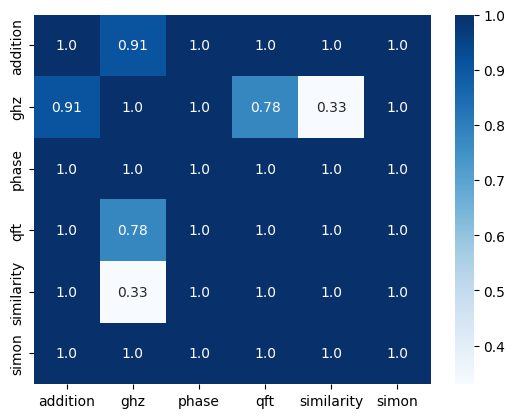

In [2]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0"; 

import urllib.request
import pandas as pd
import numpy as np
import time
import ktrain
from ktrain import tabular
from sklearn.model_selection import train_test_split
from tqdm import *
pd.set_option('display.max_columns', None)

from benchmark_circuits import *
import random
import pandas as pd
from tqdm import *
import pkgutil
import warnings
import exrex
import math
import time
import json
import scipy.stats as stats
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
warnings.filterwarnings('ignore')


# # Results

# # Results From Paper Metrics

# In[2]:


import forest.benchmarking.distance_measures as dm
from scipy.spatial.distance import jensenshannon as jhn
def HellingerDistance(p, q):
    n = len(p)
    sum_ = 0.0
    for i in range(n):
        sum_ += (np.sqrt(p[i]) - np.sqrt(q[i]))**2
    result = (1.0 / np.sqrt(2.0)) * np.sqrt(sum_)
    return result


# In[4]:


RQ1C = defaultdict(lambda:{})

for datafiles in tqdm(os.listdir("evaluation_data/")):
    print(datafiles)
    bk,name = datafiles.split(".")[0].split("_")
    with open("evaluation_data/{}_{}.json".format(bk,name),"r") as file:
        data = json.load(file)
        
    noise_data = data["noise"]
    ideal_data = data["ideal"]
    
    Filter_TVD = []
    Filter_JHN = []
    Filter_HL  = []
    Noise_TVD  = []
    Noise_JHN  = []
    Noise_HL   = []

    
    for i,(each_input_ideal,each_input_noise) in enumerate(zip(ideal_data,noise_data)):
        noise_probs = []
        ideal_probs_for_noise = []
        for key in each_input_ideal.keys():
            for noise_value in each_input_noise[key]["probability"]:
                noise_probs.append(np.round(noise_value["prob"]))
                found = False
                for values in each_input_ideal[key]["probability"]:
                    if noise_value["bin"]==values["bin"]:
                        ideal_probs_for_noise.append(values["prob"])
                        found = True
                        break
                if not found:
                    ideal_probs_for_noise.append(0)
        
        PN = np.array([ideal_probs_for_noise]).reshape(-1,1)
        QN = np.array([noise_probs]).reshape(-1,1)
        TVD_noise = dm.total_variation_distance(PN,QN)
        Noise_TVD.append(TVD_noise)
        JHN_noise = jhn(PN,QN)[0]
        Noise_JHN.append(JHN_noise)
        HL_noise = HellingerDistance(PN,QN)[0]
        Noise_HL.append(HL_noise)

        
    predictor = ktrain.load_predictor('tunning_models/{}_{}'.format(bk,name))
    for i,(each_input_ideal,each_input_noise) in enumerate(zip(ideal_data,noise_data)):
        filter_probs = []
        ideal_probs = []
        for key in each_input_ideal.keys():
            for ideal_value in each_input_ideal[key]["probability"]:
                ideal_probs.append(ideal_value["prob"])
                found = False
                for values in each_input_noise[key]["probability"]:
                    if ideal_value["bin"]==values["bin"]:
                        all_other_probs = sum([x["prob"] for x in each_input_noise[key]["probability"] if x["bin"]!=values["bin"]])
                        odr = values["odds"]
                        pos = values["prob"]
                        pof = 1-pos
                        temp2 = pd.DataFrame([[pof,odr,pos]],columns=["POF","ODR","POS"])
                        prediction = predictor.predict(temp2)[0]
                        #print(prediction)
                        if prediction[0]<0:
                            filter_probs.append(0)
                        elif prediction[0]>1:
                            filter_probs.append(1)
                        else:
                            filter_probs.append(prediction[0])        
                        found = True
                        break                
        
        if len(ideal_probs)<=1:
            ideal_probs.append(0)
            filter_probs.append(0)
        PF = np.array([ideal_probs]).reshape(-1,1)
        QF = np.array([filter_probs]).reshape(-1,1)
        print(PF,QF,ideal_probs)
        TVD_filter = dm.total_variation_distance(PF,QF)
        Filter_TVD.append(TVD_filter)
        JHN_filter = jhn(PF,QF)[0]
        Filter_JHN.append(JHN_filter)
        HL_filter = HellingerDistance(PF,QF)[0]
        Filter_HL.append(HL_filter)
    
    RQ1C[bk][name] = {"FilterTVD":Filter_TVD,
                     "NoiseTVD":Noise_TVD,
                     "FilterJHN":Filter_JHN,
                     "NoiseJHN":Noise_JHN,
                     "FilterHL":Filter_HL,
                     "NoiseHL":Noise_HL,
                    }


# In[5]:


another = {}
programs = list(RQ1C[list(RQ1C.keys())[0]].keys())
for program in programs:
    bk_tvdn = []
    bk_tvdf = []
    bk_jhnn = []
    bk_jhnf = []
    bk_hln  = []
    bk_hlf  = []
    for bk in RQ1C.keys():
        tvdn = np.mean(RQ1C[bk][program]["NoiseTVD"])
        tvdf = np.mean(RQ1C[bk][program]["FilterTVD"])
        bk_tvdn.append(tvdn)
        bk_tvdf.append(tvdf)
        jhnn = np.mean(RQ1C[bk][program]["NoiseJHN"])
        jhnf = np.mean(RQ1C[bk][program]["FilterJHN"])
        bk_jhnn.append(jhnn)
        bk_jhnf.append(jhnf)
        hln = np.mean(RQ1C[bk][program]["NoiseHL"])
        hlf = np.mean(RQ1C[bk][program]["FilterHL"])
        bk_hln.append(hln)
        bk_hlf.append(hlf)
    another[program] = {"Avg Filter TVD":np.mean(bk_tvdf),
                       "Avg Noise TVD":np.mean(bk_tvdn),
                       "Avg Filter JHN":np.mean(bk_jhnf),
                       "Avg Noise JHN":np.mean(bk_jhnn),
                       "Avg Filter HL":np.mean(bk_hlf),
                       "Avg Noise HL":np.mean(bk_hln)
                        }


# In[7]:


programs = pd.DataFrame.from_dict(another).T
programs["Improv TVD"] = np.round((programs["Avg Noise TVD"].values-programs["Avg Filter TVD"].values)/programs["Avg Noise TVD"].values*100,2)
programs["Improv JHN"] = np.round((programs["Avg Noise JHN"].values-programs["Avg Filter JHN"].values)/programs["Avg Noise JHN"].values*100,2)
programs["Improv HL"] = np.round((programs["Avg Noise HL"].values-programs["Avg Filter HL"].values)/programs["Avg Noise HL"].values*100,2)
programs[["Avg Noise HL","Avg Filter HL","Improv HL"]].to_csv("results/RQ1_HL_PP.csv")
programs[["Avg Noise HL","Avg Filter HL","Improv HL"]]


# In[8]:


another = {}

for bk in RQ1C.keys():
    bk_tvdn = []
    bk_tvdf = []
    bk_jhnn = []
    bk_jhnf = []
    bk_hln  = []
    bk_hlf  = []
    for program in RQ1C[bk].keys():
        tvdn = np.mean(RQ1C[bk][program]["NoiseTVD"])
        tvdf = np.mean(RQ1C[bk][program]["FilterTVD"])
        bk_tvdn.append(tvdn)
        bk_tvdf.append(tvdf)
        jhnn = np.mean(RQ1C[bk][program]["NoiseJHN"])
        jhnf = np.mean(RQ1C[bk][program]["FilterJHN"])
        bk_jhnn.append(jhnn)
        bk_jhnf.append(jhnf)
        hln = np.mean(RQ1C[bk][program]["NoiseHL"])
        hlf = np.mean(RQ1C[bk][program]["FilterHL"])
        bk_hln.append(hln)
        bk_hlf.append(hlf)
    another[bk.replace("Fake","")] = {"Avg Filter TVD":np.mean(bk_tvdf),
                       "Avg Noise TVD":np.mean(bk_tvdn),
                       "Avg Filter JHN":np.mean(bk_jhnf),
                       "Avg Noise JHN":np.mean(bk_jhnn),
                       "Avg Filter HL":np.mean(bk_hlf),
                       "Avg Noise HL":np.mean(bk_hln)}


# In[9]:


bk_perspective = pd.DataFrame.from_dict(another).T
bk_perspective["Improv TVD"] = np.round((bk_perspective["Avg Noise TVD"].values-bk_perspective["Avg Filter TVD"].values)/bk_perspective["Avg Noise TVD"].values*100,2)
bk_perspective["Improv JHN"] = np.round((bk_perspective["Avg Noise JHN"].values-bk_perspective["Avg Filter JHN"].values)/bk_perspective["Avg Noise JHN"].values*100,2)
bk_perspective["Improv HL"] = np.round((bk_perspective["Avg Noise HL"].values-bk_perspective["Avg Filter HL"].values)/bk_perspective["Avg Noise HL"].values*100,2)
bk_perspective[["Avg Filter HL","Avg Noise HL","Improv HL"]].sort_index().round(2).to_csv("results/RQ1_HL_BP.csv")
bk_perspective[["Avg Filter HL","Avg Noise HL","Improv HL"]].sort_index().round(2)


# # For Filter STATISTICS

# # For HL (Backend perspective)

# In[10]:


import pingouin as pg

with open("results/RQ1_statistics.txt","w") as file:

    data = pd.DataFrame(columns=["Backend","Distance"])
    backends = []
    distance = []

    for bk in RQ1C.keys():
        dist = []
        for program in RQ1C[bk].keys():
            tvdf = np.mean(RQ1C[bk][program]["FilterHL"])
            dist.append(tvdf)

        dist = np.round(dist,2)
        backends.extend([bk.replace("Fake","") for x in dist])
        distance.extend(dist)
    data["Backend"] = backends
    data["Distance"] = distance


    result = pg.kruskal(data,dv="Distance",between="Backend")
    n = data["Distance"].shape[0]
    H = result.H[0]
    effect = H*((n+1)/(n**2-1))
    mag = ""
    if effect>=0.00 and effect < 0.01:
        mag = "Negligible"
    elif effect>=0.01 and effect < 0.04:
        mag = 'Weak'
    elif effect>=0.04 and effect < 0.16:
        mag = "Moderate"
    elif effect>=0.16 and effect < 0.36:
        mag = "Relatively strong"
    elif effect>=0.36 and effect < 0.64:
        mag = "Strong"
    elif effect>=0.64 and effect < 1.00:
        mag = "Very strong"

    file.write("For Backend Aspect: pvalue = {}, Effect size = {}, Magnitude = {}\n".format(result["p-unc"][0],effect,mag))
    
    Programs = list(RQ1C[list(RQ1C.keys())[0]].keys())
    data = pd.DataFrame()
    to_check = []
    programs = []
    distance = []

    for program in Programs:
        dist = []
        for bk in RQ1C.keys():
            tvdf = np.mean(RQ1C[bk][program]["FilterHL"])
            dist.append(tvdf)

        dist = np.round(dist,2)
        programs.extend([program for x in dist])
        distance.extend(dist)
    data["Programs"] = programs
    data["Distance"] = distance

    result = pg.kruskal(data,dv="Distance",between="Programs")
    n = data["Distance"].shape[0]
    H = result.H[0]
    effect = H*((n+1)/(n**2-1))
    mag = ""
    if effect>=0.00 and effect < 0.01:
        mag = "Negligible"
    elif effect>=0.01 and effect < 0.04:
        mag = 'Weak'
    elif effect>=0.04 and effect < 0.16:
        mag = "Moderate"
    elif effect>=0.16 and effect < 0.36:
        mag = "Relatively strong"
    elif effect>=0.36 and effect < 0.64:
        mag = "Strong"
    elif effect>=0.64 and effect < 1.00:
        mag = "Very strong"

    file.write("For Program Aspect: pvalue = {}, Effect size = {}, Magnitude = {}\n".format(result["p-unc"][0],effect,mag))


# In[11]:


import scikit_posthocs as sp
result = sp.posthoc_dunn(data,val_col="Distance",group_col="Programs", p_adjust = 'bonferroni')


# In[12]:


result = result.round(2)


# In[13]:


text = []
for i in result.index:
    temp = []
    for col in result.columns:
        if result.loc[i,col]<0.05:
            temp.append("< 0.05")
        else:
            temp.append(str(result.loc[i,col]))
    text.append(temp)


# In[15]:


sns.heatmap(result, annot=np.array(text),fmt = '',cmap="Blues")
plt.savefig('./results/RQ1_dunns_PP.png',bbox_inches='tight',dpi=600)


# In[ ]:

3 3 0 8 7 3


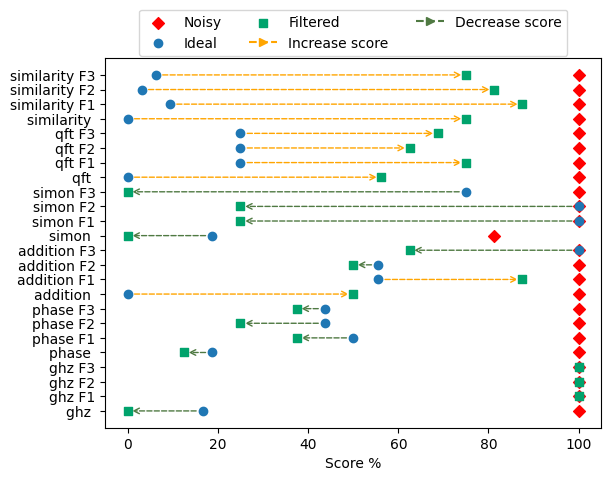

In [8]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0"; 

import urllib.request
import pandas as pd
import numpy as np
import time
import ktrain
from ktrain import tabular
from sklearn.model_selection import train_test_split
from tqdm import *
pd.set_option('display.max_columns', None)

from benchmark_circuits import *
import random
import pandas as pd
from tqdm import *
import pkgutil
import warnings
import exrex
import math
import time
import json
import scipy.stats as stats
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from statsmodels.stats.gof import chisquare
warnings.filterwarnings('ignore')


# # Select CUTs

# In[2]:


backends = [('rainbow', 23), ('weber', 53)]
BaselineCircuits,CUTs = train_test_split(get_all_circuits(),train_size=0.4,random_state=13)


# # Define QuCAT Oracles

# In[3]:


import rpy2.robjects as robjects
r = robjects.r
r['source']('chisquare.R')

def Uof(observed,expected):
    if len(observed.keys())<1:
        return "F"
    for k in observed.keys():
        if k not in expected.keys():
            return "F"
    return "P"
    
def Wodf(observed,expected):
    test = robjects.globalenv['chisquare']
    try:
        if len(observed)==1 and len(expected)==1:
            return "P"
        
        obs = []
        exp = []
        expected = dict(sorted(expected.items(), key=lambda item: item[0]))
        observed = dict(sorted(observed.items(), key=lambda item: item[0]))
        for k in set(observed.keys()).intersection(expected.keys()):
            obs.append(observed[k])
            exp.append(expected[k])
        
        for k in set(expected.keys()).difference(observed.keys()):
            exp.append(expected[k])
        
        if len(obs)<len(exp):
#             epsilon = 1024-sum(obs)
#             try:
#                 epsilon = epsilon/(len(exp)-len(obs))
#             except:
#                 epsilon = 0
            obs.extend([0 for t in range(len(exp)-len(obs))])
        
        #obs = [int(o*100) for o in obs]
        
        df_result_r = test(robjects.FloatVector(obs),robjects.FloatVector(exp))
        p = np.array(df_result_r)[0]
#         print("expected_o:",expected)
#         print("observed_o:",observed)
#         print("expected:",exp)
#         print("observed:",obs)
#         print("p-value",p)
        if p<0.01:
            return "F"
        else:
            return "P"
    except Exception as e:
        print(e)
        return "F"
    
def convertNaQp2QuCAT_notation(output,value="prob"):
    program_specification = {}
    for x in output["probability"]:
        program_specification[x["bin"]] = x[value]
    return program_specification

def filter_output(output,model,count=True):
    prediction_output = {}
    for state in output["probability"]:
        all_other_probs = sum([x["prob"] for x in output["probability"] if x["bin"]!=state["bin"]])
        odr = state["odds"]
        pos = state["prob"]
        pof = 1-pos
        df = pd.DataFrame([[pof,odr,pos]],columns=["POF","ODR","POS"])
        prediction = predictor.predict(df)[0][0]
        prediction_output[state["bin"]] = [state["count"],prediction]
        
    filtered_output = {}
    # clamp output to 0 and 1
    for k in prediction_output.keys():
        if prediction_output[k][1]>1:
            if np.abs(prediction_output[k][1]-1)<0.2:
                prediction_output[k][1] = min(prediction_output[k][1],1) 
                filtered_output[k] = prediction_output[k]
            else:
                if prediction_output[k][1]>2:
                    prediction_output[k][1] = prediction_output[k][1]%1
                    filtered_output[k] = prediction_output[k]
                
        elif prediction_output[k][1]<0:
            prediction_output[k][1] = 0.0
            filtered_output[k] = prediction_output[k]
        else:
            filtered_output[k] = prediction_output[k]

    # check for irrelevent values
#     if len(filtered_output.keys())>2:
#         temp = {}
#         maxvalue = max([filtered_output[k][0] for k in filtered_output.keys()])
#         for k in filtered_output.keys():
#             if (filtered_output[k][0]/maxvalue)>=0.35:
#                 temp[k] = filtered_output[k]
#         filtered_output =  temp
    
    temp1 = {}
    total = sum([filtered_output[k][0] for k in filtered_output.keys()])
    for k in filtered_output.keys():
        if filtered_output[k][1]==0:
            continue
        if count:
            temp1[k] = int(filtered_output[k][1]*1024)#int(filtered_output[k][1]*total)
        else:
            temp1[k] = filtered_output[k][1]
    filtered_output =  temp1
        
            
    return filtered_output,prediction_output


def filter_output_all(outputs,model,count=True):
    results = []
    for output in outputs:
        prediction_output = {}
        df = pd.DataFrame(columns=["POF","ODR","POS"])
        for state in output["probability"]:
            all_other_probs = sum([x["prob"] for x in output["probability"] if x["bin"]!=state["bin"]])
            odr = state["odds"]
            pos = state["prob"]
            pof = 1-pos
            df = df.append({"POF":pof,"ODR":odr,"POS":pos},ignore_index=True)
        
        predictions = predictor.predict(df)
        
        for state,prediction in zip(output["probability"],predictions):
            prediction_output[state["bin"]] = [state["count"],prediction[0]]
        
        #print(predictions,prediction_output)
        
        filtered_output = {}
        # clamp output to 0 and 1
        for k in prediction_output.keys():
            if prediction_output[k][1]>1:
                if np.abs(prediction_output[k][1]-1)<0.2:
                    prediction_output[k][1] = min(prediction_output[k][1],1) 
                    filtered_output[k] = prediction_output[k]
                else:
                    if prediction_output[k][1]>2:
                        prediction_output[k][1] = prediction_output[k][1]%1
                        filtered_output[k] = prediction_output[k]

            elif prediction_output[k][1]<0:
                prediction_output[k][1] = 0.0
                filtered_output[k] = prediction_output[k]
            else:
                filtered_output[k] = prediction_output[k]

    
        temp1 = {}
        total = sum([filtered_output[k][0] for k in filtered_output.keys()])
        for k in filtered_output.keys():
            if filtered_output[k][1]==0:
                continue
            if count:
                temp1[k] = int(filtered_output[k][1]*1024)#int(filtered_output[k][1]*total)
            else:
                temp1[k] = filtered_output[k][1]
        filtered_output =  temp1
        
        results.append((filtered_output,prediction_output))
    
    return results


def default_inner_template():
    return {"uof":[],"uof_w":[],"wodf":[],"wodf_w":[]}


# # Evaluate Noise QuCAT

# In[4]:


with open("results/RQ2A.json","r") as file:
    RQ2A = json.load(file)


# In[5]:


with open("results/RQ2B.json","r") as file:
    RQ2B = json.load(file)


# # Evaluate filter QuCAT

# In[6]:


with open("results/RQ2C.json","r") as file:
    RQ2C = json.load(file)


# In[7]:


data1 = pd.DataFrame(columns=["Program","Original_score","Mutant 1 score","Mutant 2 score","Mutant 3 score"])
for program in CUTs:
    org,m1,m2,m3 = [],[],[],[]
    for key in RQ2B.keys():
        for prog in RQ2B[key]:
            p_key = list(prog.keys())[0]
            if program == p_key:
                org.append(prog[p_key]["original_score"])
                m1.append(prog[p_key]["mutant1_score"])
                m2.append(prog[p_key]["mutant2_score"])
                m3.append(prog[p_key]["mutant3_score"])
                break
    
    org = np.mean(org)
    m1 = np.mean(m1)
    m2 = np.mean(m2)
    m3 = np.mean(m3)  
    data1 = pd.concat([data1, pd.DataFrame({"Program":program,
                        "Original_score":org,
                        "Mutant 1 score":m1,
                        "Mutant 2 score":m2,
                        "Mutant 3 score":m3},index=[0])], ignore_index=True)
data1


# In[8]:


data2 = pd.DataFrame(columns=["Program","Original_score","Mutant 1 score","Mutant 2 score","Mutant 3 score"])
for program in CUTs:
    org,m1,m2,m3 = [],[],[],[]
    for key in RQ2A.keys():
        for prog in RQ2A[key]:
            p_key = list(prog.keys())[0]
            if program == p_key:
                org.append(prog[p_key]["original_score"])
                m1.append(prog[p_key]["mutant1_score"])
                m2.append(prog[p_key]["mutant2_score"])
                m3.append(prog[p_key]["mutant3_score"])
                break
    
    org = np.mean(org)
    m1 = np.mean(m1)
    m2 = np.mean(m2)
    m3 = np.mean(m3)  
    data2 = pd.concat([data2, pd.DataFrame({"Program":program,
                        "Original_score":org,
                        "Mutant 1 score":m1,
                        "Mutant 2 score":m2,
                        "Mutant 3 score":m3},index=[0])], ignore_index=True)
    
data2


# In[9]:


data3 = pd.DataFrame(columns=["Program","Original_score","Mutant 1 score","Mutant 2 score","Mutant 3 score"])
for program in CUTs:
    org,m1,m2,m3 = [],[],[],[]
    for key in RQ2C.keys():
        for prog in RQ2C[key]:
            p_key = list(prog.keys())[0]
            if program == p_key:
                org.append(prog[p_key]["original_score"])
                m1.append(prog[p_key]["mutant1_score"])
                m2.append(prog[p_key]["mutant2_score"])
                m3.append(prog[p_key]["mutant3_score"])
                break
    
    org = np.mean(org)
    m1 = np.mean(m1)
    m2 = np.mean(m2)
    m3 = np.mean(m3)  
    data3 = pd.concat([data3, pd.DataFrame({"Program":program,
                        "Original_score":org,
                        "Mutant 1 score":m1,
                        "Mutant 2 score":m2,
                        "Mutant 3 score":m3},index=[0])], ignore_index=True)
data3


# # Statistical Test

# In[10]:


data_for_stat = pd.DataFrame(columns=["Program","Backend","Original_I","Mutant_1_I","Mutant_2_I","Mutant_3_I","Original_F",
                             "Mutant_1_F","Mutant_2_F","Mutant_3_F"])
for program in CUTs:
    for key in RQ2B.keys():
        org,m1,m2,m3 = 0,0,0,0
        for prog in RQ2B[key]:
            p_key = list(prog.keys())[0]
            if program == p_key:
                org = prog[p_key]["original_score"]
                m1  = prog[p_key]["mutant1_score"]
                m2  = prog[p_key]["mutant2_score"]
                m3  = prog[p_key]["mutant3_score"]
                break
                
        org3,m13,m23,m33 = 0,0,0,0
        for prog in RQ2C[key]:
            p_key = list(prog.keys())[0]
            if program == p_key:
                org3 = prog[p_key]["original_score"]
                m13  = prog[p_key]["mutant1_score"]
                m23  = prog[p_key]["mutant2_score"]
                m33  = prog[p_key]["mutant3_score"]
                break

        data_for_stat = pd.concat([data_for_stat, pd.DataFrame({"Program":program,
                            "Backend":key,
                            "Original_I":org,
                            "Mutant_1_I":m1,
                            "Mutant_2_I":m2,
                            "Mutant_3_I":m3,
                            "Mutant_1_F":m13,
                            "Mutant_2_F":m23,
                            "Mutant_3_F":m33,
                            "Original_F":org3
                           },index=[0])], ignore_index=True)

        
data_for_stat.head()


# In[11]:


import rpy2.robjects as robjects
r = robjects.r
r.library('effsize')
r['source']('A12.R')
test = robjects.globalenv['A12']

stat_data_original = pd.DataFrame(columns=["Program","Pvalue","Avalue","Mag"])
stat_data_mutant1 = pd.DataFrame(columns=["Program","Pvalue","Avalue","Mag"])
stat_data_mutant2 = pd.DataFrame(columns=["Program","Pvalue","Avalue","Mag"])
stat_data_mutant3 = pd.DataFrame(columns=["Program","Pvalue","Avalue","Mag"])

index = data_for_stat.groupby("Program").indices
for program in index.keys():
    oresult = stats.mannwhitneyu(x=data_for_stat.loc[index[program],"Original_I"],y=data_for_stat.loc[index[program],"Original_F"])
    
    df_result_r = test(robjects.FloatVector(data_for_stat.loc[index[program],"Original_I"].values),
                       robjects.FloatVector(data_for_stat.loc[index[program],"Original_F"].values))
    
    mag = str(df_result_r[2]).split("\n")[0].split()[-1]
    oeffect = float(str(df_result_r[3]).split()[-1])
    oeffect = oeffect                                 #smaller values mean better performance
    stat_data_original = pd.concat([stat_data_original,pd.DataFrame({"Program":program,
                                  "Pvalue":oresult.pvalue,
                                  "Avalue":oeffect,
                                  "Mag":mag},index=[0])],ignore_index=True)
    
    oresult = stats.mannwhitneyu(x=data_for_stat.loc[index[program],"Mutant_1_I"],y=data_for_stat.loc[index[program],"Mutant_1_F"])
    
    df_result_r = test(robjects.FloatVector(data_for_stat.loc[index[program],"Mutant_1_I"].values),
                       robjects.FloatVector(data_for_stat.loc[index[program],"Mutant_1_F"].values))
    
    mag = str(df_result_r[2]).split("\n")[0].split()[-1]
    oeffect = float(str(df_result_r[3]).split()[-1])
    oeffect = oeffect                                 #smaller values mean better performance
    stat_data_mutant1 = pd.concat([stat_data_mutant1,pd.DataFrame({"Program":program,
                                  "Pvalue":oresult.pvalue,
                                  "Avalue":oeffect,
                                  "Mag":mag},index=[0])],ignore_index=True)
    
    oresult = stats.mannwhitneyu(x=data_for_stat.loc[index[program],"Mutant_2_I"],y=data_for_stat.loc[index[program],"Mutant_2_F"])
    
    df_result_r = test(robjects.FloatVector(data_for_stat.loc[index[program],"Mutant_2_I"].values),
                       robjects.FloatVector(data_for_stat.loc[index[program],"Mutant_2_F"].values))
    
    mag = str(df_result_r[2]).split("\n")[0].split()[-1]
    oeffect = float(str(df_result_r[3]).split()[-1])
    oeffect = oeffect                                 #smaller values mean better performance
    stat_data_mutant2 = pd.concat([stat_data_mutant2,pd.DataFrame({"Program":program,
                                  "Pvalue":oresult.pvalue,
                                  "Avalue":oeffect,
                                  "Mag":mag},index=[0])],ignore_index=True)
    
    oresult = stats.mannwhitneyu(x=data_for_stat.loc[index[program],"Mutant_3_I"],y=data_for_stat.loc[index[program],"Mutant_3_F"])
    
    df_result_r = test(robjects.FloatVector(data_for_stat.loc[index[program],"Mutant_3_I"].values),
                       robjects.FloatVector(data_for_stat.loc[index[program],"Mutant_3_F"].values))
    
    mag = str(df_result_r[2]).split("\n")[0].split()[-1]
    oeffect = float(str(df_result_r[3]).split()[-1])
    oeffect = oeffect                                 #smaller values mean better performance
    stat_data_mutant3 = pd.concat([stat_data_mutant3,pd.DataFrame({"Program":program,
                                  "Pvalue":oresult.pvalue,
                                  "Avalue":oeffect,
                                  "Mag":mag},index=[0])],ignore_index=True)


# In[12]:

stat_data_original.round(2).to_csv("results/RQ2_statistics_original_programs.csv",index=False)
stat_data_mutant1.round(2).to_csv("results/RQ2_statistics_faulty1_programs.csv",index=False)
stat_data_mutant2.round(2).to_csv("results/RQ2_statistics_faulty2_programs.csv",index=False)
stat_data_mutant3.round(2).to_csv("results/RQ2_statistics_faulty3_programs.csv",index=False)

stat_data_original


# In[13]:


stat_data_mutant1


# In[14]:


stat_data_mutant2


# In[15]:


stat_data_mutant3


# In[16]:


df = pd.DataFrame(columns=["Programs","Score","Type"])
for i in range(data1.shape[0]):
    P = data1.loc[i,"Program"]
    S = data1.loc[i,"Original_score"]
    T = "Ideal"
    df = pd.concat([df,pd.DataFrame({"Programs":"{} ".format(P),"Score":S,"Type":T},index=[0])],ignore_index=True)
    P = data1.loc[i,"Program"]
    S = data1.loc[i,"Mutant 1 score"]
    T = "Ideal"
    df = pd.concat([df,pd.DataFrame({"Programs":"{} F1".format(P),"Score":S,"Type":T},index=[0])],ignore_index=True)
    P = data1.loc[i,"Program"]
    S = data1.loc[i,"Mutant 2 score"]
    T = "Ideal"
    df = pd.concat([df,pd.DataFrame({"Programs":"{} F2".format(P),"Score":S,"Type":T},index=[0])],ignore_index=True)
    P = data1.loc[i,"Program"]
    S = data1.loc[i,"Mutant 3 score"]
    T = "Ideal"
    df = pd.concat([df,pd.DataFrame({"Programs":"{} F3".format(P),"Score":S,"Type":T},index=[0])],ignore_index=True)
    
for i in range(data2.shape[0]):
    P = data2.loc[i,"Program"]
    S = data2.loc[i,"Original_score"]
    T = "Noisy"
    df = pd.concat([df,pd.DataFrame({"Programs":"{} ".format(P),"Score":S,"Type":T},index=[0])],ignore_index=True)
    P = data2.loc[i,"Program"]
    S = data2.loc[i,"Mutant 1 score"]
    T = "Noisy"
    df = pd.concat([df,pd.DataFrame({"Programs":"{} F1".format(P),"Score":S,"Type":T},index=[0])],ignore_index=True)
    P = data2.loc[i,"Program"]
    S = data2.loc[i,"Mutant 2 score"]
    T = "Noisy"
    df = pd.concat([df,pd.DataFrame({"Programs":"{} F2".format(P),"Score":S,"Type":T},index=[0])],ignore_index=True)
    P = data2.loc[i,"Program"]
    S = data2.loc[i,"Mutant 3 score"]
    T = "Noisy"
    df = pd.concat([df,pd.DataFrame({"Programs":"{} F3".format(P),"Score":S,"Type":T},index=[0])],ignore_index=True)
    
for i in range(data3.shape[0]):
    P = data3.loc[i,"Program"]
    S = data3.loc[i,"Original_score"]
    T = "Filtered"
    df = pd.concat([df,pd.DataFrame({"Programs":"{} ".format(P),"Score":S,"Type":T},index=[0])],ignore_index=True)
    P = data3.loc[i,"Program"]
    S = data3.loc[i,"Mutant 1 score"]
    T = "Filtered"
    df = pd.concat([df,pd.DataFrame({"Programs":"{} F1".format(P),"Score":S,"Type":T},index=[0])],ignore_index=True)
    P = data3.loc[i,"Program"]
    S = data3.loc[i,"Mutant 2 score"]
    T = "Filtered"
    df = pd.concat([df,pd.DataFrame({"Programs":"{} F2".format(P),"Score":S,"Type":T},index=[0])],ignore_index=True)
    P = data3.loc[i,"Program"]
    S = data3.loc[i,"Mutant 3 score"]
    T = "Filtered"
    df = pd.concat([df,pd.DataFrame({"Programs":"{} F3".format(P),"Score":S,"Type":T},index=[0])],ignore_index=True)

df.head()


# In[17]:


case1o = 0
case2o = 0
case3o = 0
case1f = 0
case2f = 0
case3f = 0

for program in df["Programs"].unique():
    if "F1" in program or "F2" in program or "F3" in program:
        ideal = df.loc[(df.Type == "Ideal") & (df.Programs == program)]["Score"].values[0]
        filtered = df.loc[(df.Type == "Filtered") & (df.Programs == program)]["Score"].values[0]
        if ideal-filtered<0:
            case3f+=1
        elif ideal-filtered==0:
            case1f+=1
    else:
        ideal = df.loc[(df.Type == "Ideal") & (df.Programs == program)]["Score"].values[0]
        filtered = df.loc[(df.Type == "Filtered") & (df.Programs == program)]["Score"].values[0]
        if ideal-filtered<0:
            case3o+=1
        elif ideal-filtered==0:
            case1o+=1


for program in df["Programs"].unique():
    if "F1" in program or "F2" in program or "F3" in program:
        ideal = df.loc[(df.Type == "Ideal") & (df.Programs == program)]["Score"].values[0]
        filtered = df.loc[(df.Type == "Filtered") & (df.Programs == program)]["Score"].values[0]
        if ideal-filtered>0:
            case2f+=1
    else:
        ideal = df.loc[(df.Type == "Ideal") & (df.Programs == program)]["Score"].values[0]
        filtered = df.loc[(df.Type == "Filtered") & (df.Programs == program)]["Score"].values[0]
        if ideal-filtered>0:
            case2o+=1


# In[18]:


label = {}
revlabel = {}
i=0
for x in df["Programs"].unique():
    label[x] = i
    revlabel[i] = x
    i+=1

df["y"] = 0

for i in range(df.shape[0]):
    df.loc[i,"y"] = label[df.loc[i,"Programs"]]

fig, ax = plt.subplots()

ax.scatter(x=df[df["Type"]=="Noisy"]["Score"],y=df[df["Type"]=="Noisy"]["y"],c="r",marker="D",label="Noisy")

ax.scatter(x=df[df["Type"]=="Ideal"]["Score"],y=df[df["Type"]=="Ideal"]["y"],label="Ideal")
ticks = [x for x in range(df["y"].max()+1)]
ticklabels = [revlabel[x] if x in label.values() else "" for x in range(df["y"].max()+1)]
ax.set_yticks(ticks)
ax.set_yticklabels(ticklabels)
ax.set_xlabel("Score %")



ax.scatter(x=df[df["Type"]=="Filtered"]["Score"],y=df[df["Type"]=="Filtered"]["y"],c="#00A36C",marker="s",label="Filtered")

for program in df["Programs"].unique():
    ideal = df.loc[(df.Type == "Ideal") & (df.Programs == program)]["Score"].values[0]
    filtered = df.loc[(df.Type == "Filtered") & (df.Programs == program)]["Score"].values[0]
    if ideal-filtered<0:
        plt.annotate("",xy=(filtered-1,label[program]),xytext=(ideal+1.5,label[program]),xycoords="data",
                     arrowprops={"arrowstyle" : "->", "linestyle" : "--",
                                 "linewidth" : 1, "shrinkA": 0, "shrinkB": 0,
                                "color":'orange'})
        
    if ideal-filtered>0:
        plt.annotate("",xy=(filtered+1,label[program]),xytext=(ideal-1.5,label[program]),xycoords="data",
                     arrowprops={"arrowstyle" : "->", "linestyle" : "--",
                                 "linewidth" : 1, "shrinkA": 0, "shrinkB": 0,
                                "color":'#4F7942'})
        
        


plt.plot([], [], '-->',c="orange", label="Increase score")
plt.plot([], [], '-->',c="#4F7942", label="Decrease score")
plt.legend(bbox_to_anchor =(0.5, 1.15), ncol = 3,loc=9)
plt.savefig("results/RQ2B1.png",dpi=600,bbox_inches='tight')


# In[19]:


print(case2o,case3o,case1o,case2f,case3f,case1f)


# In[45]:


data = pd.DataFrame(columns=["Program","Precision_O","Recall_O","Precision_M1","Recall_M1",
                            "Precision_M2","Recall_M2","Precision_M3","Recall_M3",
                            "F1_O","F1_M1","F1_M2","F1_M3"])

# data = pd.DataFrame(columns=["Program","Precision_O","Recall_O","Precision_M1","Recall_M1",
#                             "Precision_M2","Recall_M2","Precision_M3","Recall_M3",
#                             "F1_O","F1_baseline_O","F1_M1","F1_baseline_M1","F1_M2","F1_baseline_M2","F1_M3","F1_baseline_M3"])

total_inputs = []
filter_FP = []
filter_FN = []


for i in range(data1.shape[0]):
    algo = get_circuit_class_object(data1.loc[i,"Program"])
    total = len(algo.get_full_inputs())
    total_inputs.append(total)
    total_inputs.append(total)
    total_inputs.append(total)
    total_inputs.append(total)
    
    Ipositives = total-((data1.loc[i,"Original_score"]/100)*total)
    Inegatives = (data1.loc[i,"Original_score"]/100)*total
    Fpositives = total-((data3.loc[i,"Original_score"]/100)*total)
    Fnegatives = (data3.loc[i,"Original_score"]/100)*total
    TP = abs(Ipositives-abs(Ipositives-Fpositives))
    FP = Fpositives-TP
    TN = abs(Inegatives-abs(Inegatives-Fnegatives))
    FN = Fnegatives-TN
    precision = TP/(TP+FP)
    recall = TP/(TP+FN) 
    data.loc[i,"Precision_O"] = precision
    data.loc[i,"Recall_O"] = recall
    f1 = 2 * (precision * recall) / (precision + recall)
    data.loc[i,"F1_O"] = f1
    
    filter_FP.append(FP)
    filter_FN.append(FN)
    
    Ipositives = (data1.loc[i,"Mutant 1 score"]/100)*total
    Inegatives = total-Ipositives
    Fpositives = (data3.loc[i,"Mutant 1 score"]/100)*total
    Fnegatives = total-Fpositives
    TP = abs(Ipositives-abs(Ipositives-Fpositives))
    FP = Fpositives-TP
    TN = abs(Inegatives-abs(Inegatives-Fnegatives))
    FN = Fnegatives-TN
    precision = TP/(TP+FP)
    recall = TP/(TP+FN) 
    data.loc[i,"Precision_M1"] = precision
    data.loc[i,"Recall_M1"] = recall
    f1 = 2 * (precision * recall) / (precision + recall)
    data.loc[i,"F1_M1"] = f1
    
    filter_FP.append(FP)
    filter_FN.append(FN)
    
    Ipositives = (data1.loc[i,"Mutant 2 score"]/100)*total
    Inegatives = total-Ipositives    
    Fpositives = (data3.loc[i,"Mutant 2 score"]/100)*total
    Fnegatives = total-Fpositives
    TP = abs(Ipositives-abs(Ipositives-Fpositives))
    FP = Fpositives-TP
    TN = abs(Inegatives-abs(Inegatives-Fnegatives))
    FN = Fnegatives-TN
    precision = TP/(TP+FP)
    recall = TP/(TP+FN) 
    data.loc[i,"Precision_M2"] = precision
    data.loc[i,"Recall_M2"] = recall
    f1 = 2 * (precision * recall) / (precision + recall)
    data.loc[i,"F1_M2"] = f1
    
    filter_FP.append(FP)
    filter_FN.append(FN)
    
    Ipositives = (data1.loc[i,"Mutant 3 score"]/100)*total
    Inegatives = total-Ipositives
    Fpositives = (data3.loc[i,"Mutant 3 score"]/100)*total
    Fnegatives = total-Fpositives
    TP = abs(Ipositives-abs(Ipositives-Fpositives))
    FP = Fpositives-TP
    TN = abs(Inegatives-abs(Inegatives-Fnegatives))
    FN = Fnegatives-TN
    precision = TP/(TP+FP)
    recall = TP/(TP+FN) 
    data.loc[i,"Precision_M3"] = precision
    data.loc[i,"Recall_M3"] = recall
    f1 = 2 * (precision * recall) / (precision + recall)
    data.loc[i,"F1_M3"] = f1
    
    filter_FP.append(FP)
    filter_FN.append(FN)
    
    data.loc[i,"Program"] = data1.loc[i,"Program"]
    
data = data.fillna(0)


# In[46]:


data["F1_O F1_M1 F1_M2 F1_M3".split()]


# In[47]:


F1_filtered_score = data["F1_O F1_M1 F1_M2 F1_M3".split()].stack().mean()


# In[56]:


totalF = sum(total_inputs)


# In[49]:


filterFP = sum(filter_FP)
filterFN = sum(filter_FN)


# # For noise

# In[50]:


data = pd.DataFrame(columns=["Program","Precision_O","Recall_O","Precision_M1","Recall_M1",
                            "Precision_M2","Recall_M2","Precision_M3","Recall_M3",
                            "F1_O","F1_M1","F1_M2","F1_M3"])

# data = pd.DataFrame(columns=["Program","Precision_O","Recall_O","Precision_M1","Recall_M1",
#                             "Precision_M2","Recall_M2","Precision_M3","Recall_M3",
#                             "F1_O","F1_baseline_O","F1_M1","F1_baseline_M1","F1_M2","F1_baseline_M2","F1_M3","F1_baseline_M3"])

total_inputs = []
Noise_FP = []
Noise_FN = []

for i in range(data1.shape[0]):
    algo = get_circuit_class_object(data1.loc[i,"Program"])
    total = len(algo.get_full_inputs())
    total_inputs.append(total)
    
    Ipositives = total-((data1.loc[i,"Original_score"]/100)*total)
    Inegatives = (data1.loc[i,"Original_score"]/100)*total
    Fpositives = total-((data2.loc[i,"Original_score"]/100)*total)
    Fnegatives = (data2.loc[i,"Original_score"]/100)*total
    TP = abs(Ipositives-abs(Ipositives-Fpositives))
    FP = Fpositives-TP
    TN = abs(Inegatives-abs(Inegatives-Fnegatives))
    FN = Fnegatives-TN
    precision = TP/(TP+FP)
    recall = TP/(TP+FN) 
    data.loc[i,"Precision_O"] = precision
    data.loc[i,"Recall_O"] = recall
    f1 = 2 * (precision * recall) / (precision + recall)
    data.loc[i,"F1_O"] = f1
    
    Noise_FP.append(FP)
    Noise_FN.append(FN)
    
    Ipositives = (data1.loc[i,"Mutant 1 score"]/100)*total
    Inegatives = total-Ipositives
    Fpositives = (data2.loc[i,"Mutant 1 score"]/100)*total
    Fnegatives = total-Fpositives
    TP = abs(Ipositives-abs(Ipositives-Fpositives))
    FP = Fpositives-TP
    TN = abs(Inegatives-abs(Inegatives-Fnegatives))
    FN = Fnegatives-TN
    precision = TP/(TP+FP)
    recall = TP/(TP+FN) 
    data.loc[i,"Precision_M1"] = precision
    data.loc[i,"Recall_M1"] = recall
    f1 = 2 * (precision * recall) / (precision + recall)
    data.loc[i,"F1_M1"] = f1
    
    Noise_FP.append(FP)
    Noise_FN.append(FN)
    
    Ipositives = (data1.loc[i,"Mutant 2 score"]/100)*total
    Inegatives = total-Ipositives    
    Fpositives = (data2.loc[i,"Mutant 2 score"]/100)*total
    Fnegatives = total-Fpositives
    TP = abs(Ipositives-abs(Ipositives-Fpositives))
    FP = Fpositives-TP
    TN = abs(Inegatives-abs(Inegatives-Fnegatives))
    FN = Fnegatives-TN
    precision = TP/(TP+FP)
    recall = TP/(TP+FN) 
    data.loc[i,"Precision_M2"] = precision
    data.loc[i,"Recall_M2"] = recall
    f1 = 2 * (precision * recall) / (precision + recall)
    data.loc[i,"F1_M2"] = f1
    
    Noise_FP.append(FP)
    Noise_FN.append(FN)
    
    Ipositives = (data1.loc[i,"Mutant 3 score"]/100)*total
    Inegatives = total-Ipositives
    Fpositives = (data2.loc[i,"Mutant 3 score"]/100)*total
    Fnegatives = total-Fpositives
    TP = abs(Ipositives-abs(Ipositives-Fpositives))
    FP = Fpositives-TP
    TN = abs(Inegatives-abs(Inegatives-Fnegatives))
    FN = Fnegatives-TN
    precision = TP/(TP+FP)
    recall = TP/(TP+FN) 
    data.loc[i,"Precision_M3"] = precision
    data.loc[i,"Recall_M3"] = recall
    f1 = 2 * (precision * recall) / (precision + recall)
    data.loc[i,"F1_M3"] = f1
    
    Noise_FP.append(FP)
    Noise_FN.append(FN)
    
    data.loc[i,"Program"] = data1.loc[i,"Program"]
    
data = data.fillna(0)


# In[51]:


F1_noise_score = data["F1_O F1_M1 F1_M2 F1_M3".split()].stack().mean()


# In[52]:


NoiseFP = sum(Noise_FP)
NoiseFN = sum(Noise_FN)


# In[54]:


with open("results/RQ2_cases.txt","w") as file:
    file.write("Original Case1 = {}\n".format(case1o))
    file.write("Original Case2 = {}\n".format(case2o))
    file.write("Original Case3 = {}\n".format(case3o))
    file.write("Faulty Case1 = {}\n".format(case1f))
    file.write("Faulty Case2 = {}\n".format(case2f))
    file.write("Faulty Case3 = {}\n".format(case3f))
    
    file.write("Original Significant = {}\n".format(sum(stat_data_original.Pvalue<0.05)))
    file.write("Faulty Significant = {}\n".format(sum(stat_data_mutant1.Pvalue<0.05)+sum(stat_data_mutant2.Pvalue<0.05)+sum(stat_data_mutant3.Pvalue<0.05)))
    file.write("Original Large = {}\n".format(sum(stat_data_original.Mag=="large")))
    file.write("Faulty Large = {}\n".format(sum(stat_data_mutant1.Mag=="large")+sum(stat_data_mutant2.Mag=="large")+sum(stat_data_mutant3.Mag=="large")))
    
    file.write("F1_filtered = {}\n".format(F1_filtered_score))
    file.write("F1_Noise = {}\n".format(F1_noise_score))

    file.write("FalsePositives Filtered = {}\n".format(filterFP))
    file.write("FalseNegatives Filtered = {}\n".format(filterFN))

    file.write("FalsePositives Noise = {}\n".format(NoiseFP))
    file.write("FalseNegatives Noise = {}\n".format(NoiseFN))
    
    file.write("Total Inputs = {}\n".format(totalF))


# In[ ]:

In [2]:
data1

,Program,Original_score,Mutant 1 score,Mutant 2 score,Mutant 3 score
0,ghz,16.666667,100.000000,100.000000,100.00
1,phase,18.750000,50.000000,43.750000,43.75
2,addition,0.000000,55.555556,55.555556,100.00
3,simon,18.750000,100.000000,100.000000,75.00
4,qft,0.000000,25.000000,25.000000,25.00
5,similarity,0.000000,9.375000,3.125000,6.25


In [5]:
backends = [('rainbow', 23), ('weber', 53)]
backend_factory = BackendFactory()
backend = backend_factory.initialize_backend()
backend_executors = {}
for bk,_ in tqdm(backends):
    backend_executors[bk] = backend_factory.initialize_backend(name=bk)
circ = get_circuit_class_object_mutation(name="addition_M3")

100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 3840.94it/s]


In [6]:
circ.get_result(backend=backend_executors["weber"],input_data=[1,1])

{'probability': [{'bin': '00',
   'count': 205,
   'odds': 0.2503052503052503,
   'prob': 0.2001953125},
  {'bin': '01',
   'count': 223,
   'odds': 0.2784019975031211,
   'prob': 0.2177734375},
  {'bin': '10',
   'count': 261,
   'odds': 0.3420707732634338,
   'prob': 0.2548828125},
  {'bin': '11',
   'count': 335,
   'odds': 0.4862119013062409,
   'prob': 0.3271484375}]}

In [19]:
circ.get_result(backend=backend,input_data=[1,1])

{'probability': [{'bin': '0', 'count': 1024, 'odds': inf, 'prob': 1.0}]}

In [7]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0"; 

import urllib.request
import pandas as pd
import numpy as np
import time
import ktrain
from ktrain import tabular
from sklearn.model_selection import train_test_split
from tqdm import *
pd.set_option('display.max_columns', None)

from benchmark_circuits import *
import random
import pandas as pd
from tqdm import *
import pkgutil
import warnings
import exrex
import math
import time
import json
import scipy.stats as stats
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from statsmodels.stats.gof import chisquare
warnings.filterwarnings('ignore')


class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NpEncoder, self).default(obj)

# # Select CUTs

# In[2]:


backends = [('rainbow', 23), ('weber', 53)]
BaselineCircuits,CUTs = train_test_split(get_all_circuits(),train_size=0.4,random_state=13)


# # Define QuCAT Oracles

# In[3]:


import rpy2.robjects as robjects
r = robjects.r
r['source']('chisquare.R')

def Uof(observed,expected):
    if len(observed.keys())<1:
        return "F"
    for k in observed.keys():
        if k not in expected.keys():
            return "F"
    return "P"
    
def Wodf(observed,expected):
    test = robjects.globalenv['chisquare']
    try:
        if len(observed)==1 and len(expected)==1:
            return "P"
        
        obs = []
        exp = []
        expected = dict(sorted(expected.items(), key=lambda item: item[0]))
        observed = dict(sorted(observed.items(), key=lambda item: item[0]))
        for k in set(observed.keys()).intersection(expected.keys()):
            obs.append(observed[k])
            exp.append(expected[k])
        
        for k in set(expected.keys()).difference(observed.keys()):
            exp.append(expected[k])
        
        if len(obs)<len(exp):
#             epsilon = 1024-sum(obs)
#             try:
#                 epsilon = epsilon/(len(exp)-len(obs))
#             except:
#                 epsilon = 0
            obs.extend([0 for t in range(len(exp)-len(obs))])
        
        #obs = [int(o*100) for o in obs]
        
        df_result_r = test(robjects.FloatVector(obs),robjects.FloatVector(exp))
        p = np.array(df_result_r)[0]
#         print("expected_o:",expected)
#         print("observed_o:",observed)
#         print("expected:",exp)
#         print("observed:",obs)
#         print("p-value",p)
        if p<0.01:
            return "F"
        else:
            return "P"
    except Exception as e:
        print(e)
        return "F"
    
def convertNaQp2QuCAT_notation(output,value="prob"):
    program_specification = {}
    for x in output["probability"]:
        program_specification[x["bin"]] = x[value]
    return program_specification

def filter_output(output,model,count=True):
    prediction_output = {}
    for state in output["probability"]:
        all_other_probs = sum([x["prob"] for x in output["probability"] if x["bin"]!=state["bin"]])
        odr = state["odds"]
        pos = state["prob"]
        pof = 1-pos
        df = pd.DataFrame([[pof,odr,pos]],columns=["POF","ODR","POS"])
        prediction = predictor.predict(df)[0][0]
        prediction_output[state["bin"]] = [state["count"],prediction]
        
    filtered_output = {}
    # clamp output to 0 and 1
    for k in prediction_output.keys():
        if prediction_output[k][1]>1:
            if np.abs(prediction_output[k][1]-1)<0.2:
                prediction_output[k][1] = min(prediction_output[k][1],1) 
                filtered_output[k] = prediction_output[k]
            else:
                if prediction_output[k][1]>2:
                    prediction_output[k][1] = prediction_output[k][1]%1
                    filtered_output[k] = prediction_output[k]
                
        elif prediction_output[k][1]<0:
            prediction_output[k][1] = 0.0
            filtered_output[k] = prediction_output[k]
        else:
            filtered_output[k] = prediction_output[k]

    # check for irrelevent values
#     if len(filtered_output.keys())>2:
#         temp = {}
#         maxvalue = max([filtered_output[k][0] for k in filtered_output.keys()])
#         for k in filtered_output.keys():
#             if (filtered_output[k][0]/maxvalue)>=0.35:
#                 temp[k] = filtered_output[k]
#         filtered_output =  temp
    
    temp1 = {}
    total = sum([filtered_output[k][0] for k in filtered_output.keys()])
    for k in filtered_output.keys():
        if filtered_output[k][1]==0:
            continue
        if count:
            temp1[k] = int(filtered_output[k][1]*1024)#int(filtered_output[k][1]*total)
        else:
            temp1[k] = filtered_output[k][1]
    filtered_output =  temp1
        
            
    return filtered_output,prediction_output


def filter_output_all(outputs,model,count=True):
    results = []
    for output in outputs:
        prediction_output = {}
        df = pd.DataFrame(columns=["POF","ODR","POS"])
        for state in output["probability"]:
            all_other_probs = sum([x["prob"] for x in output["probability"] if x["bin"]!=state["bin"]])
            odr = state["odds"]
            pos = state["prob"]
            pof = 1-pos
            df = df.append({"POF":pof,"ODR":odr,"POS":pos},ignore_index=True)
        
        predictions = predictor.predict(df)
        
        for state,prediction in zip(output["probability"],predictions):
            prediction_output[state["bin"]] = [state["count"],prediction[0]]
        
        #print(predictions,prediction_output)
        
        filtered_output = {}
        # clamp output to 0 and 1
        for k in prediction_output.keys():
            if prediction_output[k][1]>1:
                if np.abs(prediction_output[k][1]-1)<0.2:
                    prediction_output[k][1] = min(prediction_output[k][1],1) 
                    filtered_output[k] = prediction_output[k]
                else:
                    if prediction_output[k][1]>2:
                        prediction_output[k][1] = prediction_output[k][1]%1
                        filtered_output[k] = prediction_output[k]

            elif prediction_output[k][1]<0:
                prediction_output[k][1] = 0.0
                filtered_output[k] = prediction_output[k]
            else:
                filtered_output[k] = prediction_output[k]

    
        temp1 = {}
        total = sum([filtered_output[k][0] for k in filtered_output.keys()])
        for k in filtered_output.keys():
            if filtered_output[k][1]==0:
                continue
            if count:
                temp1[k] = int(filtered_output[k][1]*1024)#int(filtered_output[k][1]*total)
            else:
                temp1[k] = filtered_output[k][1]
        filtered_output =  temp1
        
        results.append((filtered_output,prediction_output))
    
    return results


def default_inner_template():
    return {"uof":[],"uof_w":[],"wodf":[],"wodf_w":[]}


# In[4]:


backend_factory = BackendFactory()
backend = backend_factory.initialize_backend()
backend_executors = {}
for bk,_ in tqdm(backends):
    backend_executors[bk] = backend_factory.initialize_backend(name=bk)



# # Evaluate filter QuCAT

# In[7]:


RQ2C = {}

for bk,_ in tqdm(backends):
    backend_noise = backend_executors[bk]
    backend_result = []

    for cut in CUTs:
        #if cut!="phase":
        #    continue
        predictor = ktrain.load_predictor('tunning_models/{}_{}'.format(bk,cut))
        algo = get_circuit_class_object(cut)
        total_inputs = 0
        original_score = 0
        mutant1_score = 0
        mutant2_score = 0
        mutant3_score = 0
        for inp in algo.get_inputs():

            total_inputs+=1

            ps = algo.get_result(backend,inp)
            ps_noise = algo.get_result(backend_noise,inp)
            ps = convertNaQp2QuCAT_notation(ps,value='prob')
            
            ps_noise, _prediction =  filter_output(ps_noise,predictor,False)
            
            #print(ps,ps_noise,_prediction)
            

            result = Uof(ps_noise,ps)
            #print("Uof ps_noise,ps = ",result)
            if result=="P":
                result = Wodf(ps_noise,ps)
                #print("Wodf ps_noise,ps = ",result)
                if result=="F":
                    original_score+=1
            else:
                original_score+=1
                #print("original_score ",original_score)
                #input(inp)

            # mutant 1:
            mutant1 = get_circuit_class_object_mutation(cut+"_M1")
            mutant_output = mutant1.get_result(backend_noise,inp)
            mutant_output, _prediction =  filter_output(mutant_output,predictor,False)
            #mutant_output = convertNaQp2QuCAT_notation(mutant_output,value='count')
            result = Uof(mutant_output,ps)
            #print("Uof mutant1,ps = ",result)
            if result=="P":
                result = Wodf(mutant_output,ps)
                #print("Wodf mutant,ps = ",result)
                if result=="F":
                    mutant1_score+=1
            else:
                mutant1_score+=1
                
            # mutant 2:
            mutant2 = get_circuit_class_object_mutation(cut+"_M2")
            mutant_output = mutant2.get_result(backend_noise,inp)
            mutant_output, _prediction =  filter_output(mutant_output,predictor,False)
            #mutant_output = convertNaQp2QuCAT_notation(mutant_output,value='count')
            result = Uof(mutant_output,ps)
            #print("Uof mutant1,ps = ",result)
            if result=="P":
                result = Wodf(mutant_output,ps)
                #print("Wodf mutant,ps = ",result)
                if result=="F":
                    mutant2_score+=1
            else:
                mutant2_score+=1

            # mutant 1:
            mutant3 = get_circuit_class_object_mutation(cut+"_M3")
            mutant_output = mutant3.get_result(backend_noise,inp)
            mutant_output, _prediction =  filter_output(mutant_output,predictor,False)
            #mutant_output = convertNaQp2QuCAT_notation(mutant_output,value='count')
            result = Uof(mutant_output,ps)
            #print("Uof mutant1,ps = ",result)
            if result=="P":
                result = Wodf(mutant_output,ps)
                #print("Wodf mutant,ps = ",result)
                if result=="F":
                    mutant3_score+=1
            else:
                mutant3_score+=1
                
        original_score = (original_score/total_inputs)*100
        mutant1_score = (mutant1_score/total_inputs)*100
        mutant2_score = (mutant2_score/total_inputs)*100
        mutant3_score = (mutant3_score/total_inputs)*100
        
        backend_result.append({cut:{"original_score":original_score,"mutant1_score":mutant1_score,
                         "mutant2_score":mutant2_score,
                         "mutant3_score":mutant3_score}})
        
        #print(original_score,mutant1_score)
        #break
    RQ2C[bk] = backend_result

    file = open("results/RQ2C.json","w")
    json.dump(RQ2C,file,cls=NpEncoder)
    file.close()

  0%|                                                                                             | 0/2 [00:00<?, ?it/s]

['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   

 50%|██████████████████████████████████████████                                          | 1/2 [06:48<06:48, 408.74s/it]

['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   Target Value
0           0.0
['Target Value']
   

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [13:51<00:00, 415.86s/it]

['Target Value']
   Target Value
0           0.0


In [1]:
# density

In [ ]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0"; 

import urllib.request
import pandas as pd
import numpy as np
import time
import ktrain
from ktrain import tabular
from sklearn.model_selection import train_test_split
from tqdm import *
pd.set_option('display.max_columns', None)

from benchmark_circuits import *
import random
import pandas as pd
from tqdm import *
import pkgutil
import warnings
import exrex
import math
import time
import json
import scipy.stats as stats
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
warnings.filterwarnings('ignore')


class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NpEncoder, self).default(obj)

def getIntegers(startRange,upperlimit):
    return [x for x in range(startRange,startRange+upperlimit)]

def getallBinaryValues(number_bits):
    max_number = np.power(2,number_bits)-1
    data = []
    for x in range(0,max_number):
        value = bin(x).replace("0b","")
        value = "0"*(number_bits-len(value))+value
        data.append(value)
    return data

def getexpression(regex,upperlimit):
    return [exrex.getone(regex) for x in range(upperlimit)]


def generate_data(Format,startRange,endRange,percentage,regex,circuit):
    data = []
    if Format=="int":
        upperlimit = int(np.ceil((endRange-startRange)*percentage))
        data = getIntegers(startRange,upperlimit)
    if Format=="binary":
        upperlimit = int(np.ceil((endRange-startRange)*percentage))
        data = getallBinaryValues(startRange+upperlimit)
    if Format=="expression":
        upperlimit = int(np.ceil((math.factorial(startRange))*percentage))
        data = getexpression(regex,upperlimit)
    return data,circuit

def read_configuration(filepath):
    with open(filepath,"r") as file:
        content = file.read()
    rules = content.split("-"*20)
    rules_dict = {}
    for rule in rules:
        try:
            parameters = rule.split("\n")
            parameter_dict = {}
            for parameter in parameters:
                if parameter!="":
                    key,value = parameter.split(":")
                    value = value.strip()
                    if value.isdigit():
                        value = int(value)
                    else:
                        try:
                            value = float(value)
                        except:
                            pass
                    parameter_dict[key] = value
            rules_dict[parameter_dict.pop("ID")] = parameter_dict
        except:
            continue
    return rules_dict


# # Select CUTs

# In[2]:


backends = [('rainbow', 23)]
BaselineCircuits,CUTs = train_test_split(get_all_circuits(),train_size=0.4,random_state=13)


# # Get Evaluation data for CUTs

# In[3]:


rules = read_configuration("Configuration.txt")
data_circuit_pairs = []
for baseline_circuit in CUTs:
    circuit = get_circuit_class_object(baseline_circuit)
    print("Generating data for CUT circuit: {}, ID:{}".format(baseline_circuit,circuit.key_aurguments["ID"]))
    rule = rules[circuit.key_aurguments["ID"]]
    data,circuit = generate_data(Format=rule["FORMAT"],startRange=rule["START"],
                                 endRange=rule["END"],percentage=rule["PERCENTAGE"],
                                 regex=rule["REGEX"],circuit=circuit)
    data_circuit_pairs.append((data,circuit,baseline_circuit))

#data_circuit_pairs


# # Execute on Backends

# In[4]:


backend_factory = BackendFactory()
backend = backend_factory.initialize_backend()
backend_executor = {}
for bk, qubit_size in tqdm(backends):
    backend_executor[bk] = backend_factory.initialize_backend(bk)
    
for inter in range(10):
    for bk, qubit_size in tqdm(backends):

        print("Generating Data For {} Backend".format(bk))
        print("------------------------------------------")

        for data,circuit,name in data_circuit_pairs:
            noise_data = []
            ideal_data = []
            print("Executing CUT circuit ID: {}".format(circuit.key_aurguments["ID"]))

            if circuit.key_aurguments["input_type"]==1:
                for inp in data:
                    ideal = circuit.get_result(backend,inp)
                    Noise = circuit.get_result(backend_executor[bk],inp)
                    noise_data.append({"{}".format(inp):Noise})
                    ideal_data.append({"{}".format(inp):ideal})

            elif circuit.key_aurguments["input_type"]==2:
                pairs = [[x,y] for y in data for x in data]
                for inp in pairs:
                    ideal = circuit.get_result(backend,inp)
                    Noise = circuit.get_result(backend_executor[bk],inp)
                    noise_data.append({"{}:{}".format(inp[0],inp[1]):Noise})
                    ideal_data.append({"{}:{}".format(inp[0],inp[1]):ideal})

        # #-=-=-=-=-=-=-==-=-=-=-=-=-=-==-Saving json-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
            data = {"ideal":ideal_data,"noise":noise_data}
            file = open("density/_{}_{}_{}.json".format(inter,bk,name),"w")
            json.dump(data,file,cls=NpEncoder)
            file.close()